#  Customer Segmentation using Clustering Methods

This notebooks contains 
- Feature Preprosessing
- Explaratory Data Analysis,
- Feature preparation and transformation
- K-Means clustering model
- Cluster Analyis
- Conclusion

In [4]:
#load the important libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format ='retina'
pd.set_option('display.max_colwidth', -1)

### Load data

In [5]:
# re-read read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [6]:
import helpers as h

In [7]:
transcript_clean, transcript_all = h.transcript_preprocessing(transcript, profile, portfolio)

The transcript_clean.csv and transcript_merge.csv file are available at local folder


In [10]:
transcript_clean.head()

,person,event,value,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,name,web,email,mobile,social,invalid
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,bogo_5_5_7,1.0,1.0,1.0,0.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,None,118,2017-08-04,NaN,5.0,20.0,10.0,discount,discount_20_5_10,1.0,1.0,0.0,0.0,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,M,68,2018-04-26,70000.0,2.0,10.0,7.0,discount,discount_10_2_7,1.0,1.0,1.0,0.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,None,118,2017-09-25,NaN,2.0,10.0,10.0,discount,discount_10_2_10,1.0,1.0,1.0,1.0,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,None,118,2017-10-02,NaN,10.0,10.0,5.0,bogo,bogo_10_10_5,1.0,1.0,1.0,1.0,0.0


In [11]:
transcript_all.head()

,person,event,value,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,name,web,email,mobile,social,invalid
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,bogo_5_5_7,1.0,1.0,1.0,0.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,None,118,2017-08-04,NaN,5.0,20.0,10.0,discount,discount_20_5_10,1.0,1.0,0.0,0.0,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,M,68,2018-04-26,70000.0,2.0,10.0,7.0,discount,discount_10_2_7,1.0,1.0,1.0,0.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,None,118,2017-09-25,NaN,2.0,10.0,10.0,discount,discount_10_2_10,1.0,1.0,1.0,1.0,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,None,118,2017-10-02,NaN,10.0,10.0,5.0,bogo,bogo_10_10_5,1.0,1.0,1.0,1.0,0.0


In [12]:
transcript_all.shape

(306534, 20)

In [13]:
transcript_clean.shape

(297057, 20)

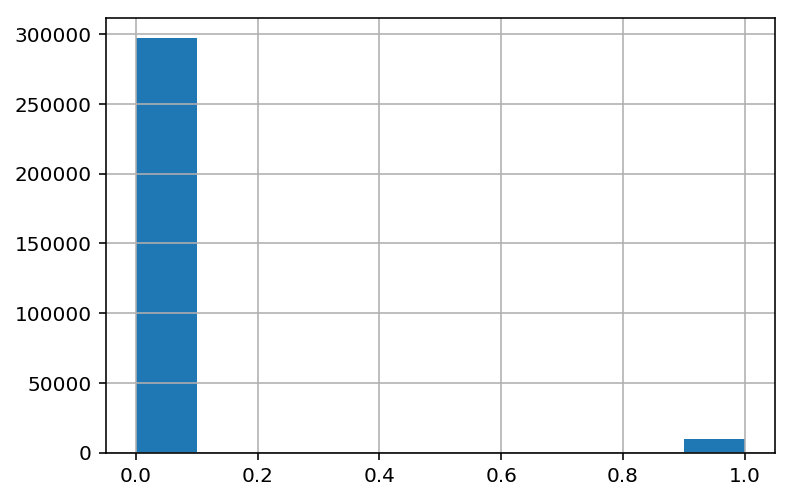

In [14]:
transcript_all.invalid.hist()

In [17]:
event_count = transcript_clean.groupby(['name', 'offer_type','event']).size().unstack()
event_count['offer_received_frac'] = event_count['offer received']/ event_count['offer received']
event_count['offer_viewed_frac'] = event_count['offer viewed']/ event_count['offer received']
event_count['offer_completed_frac'] =  event_count['offer completed']/ event_count['offer received']

event_count_frac = event_count[['offer_received_frac','offer_viewed_frac', 'offer_completed_frac']]
event_count_frac.reset_index()

event,name,offer_type,offer_received_frac,offer_viewed_frac,offer_completed_frac
0,bogo_10_10_5,bogo,1.0,0.961148,0.369946
1,bogo_10_10_7,bogo,1.0,0.876991,0.352964
2,bogo_5_5_5,bogo,1.0,0.959451,0.471536
3,bogo_5_5_7,bogo,1.0,0.543311,0.287091
4,discount_10_2_10,discount,1.0,0.964460,0.623404
5,discount_10_2_7,discount,1.0,0.539570,0.288391
6,discount_20_5_10,discount,1.0,0.347287,0.184924
7,discount_7_3_7,discount,1.0,0.959587,0.583442
8,informational_0_0_3,informational,1.0,0.877789,NaN
9,informational_0_0_4,informational,1.0,0.544046,NaN


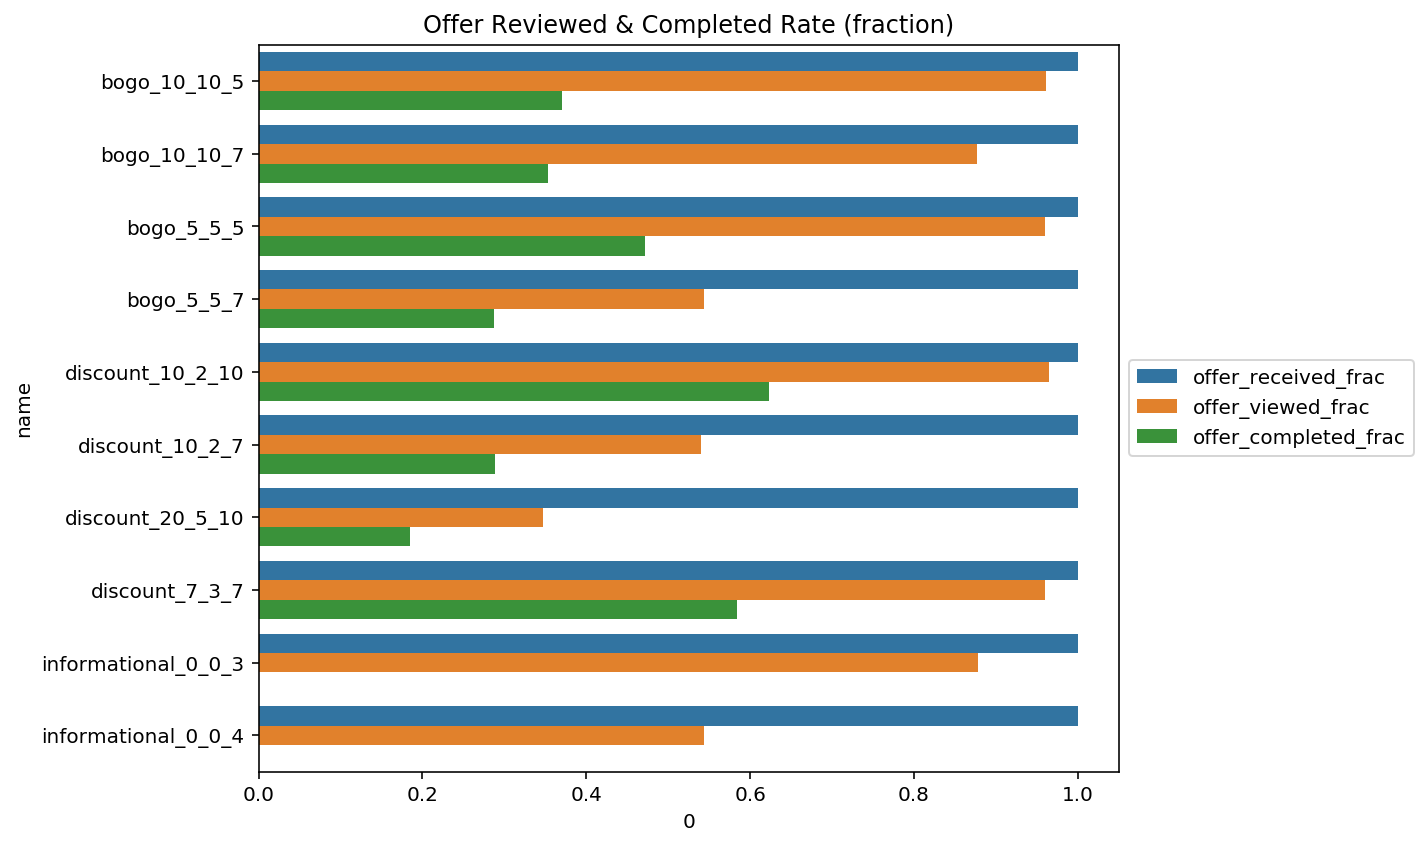

In [19]:
event_count_stack = event_count_frac.stack().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x=0,y='name', hue='event', data=event_count_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(top=0.8)
plt.title("Offer Reviewed & Completed Rate (fraction)")

plt.tight_layout()

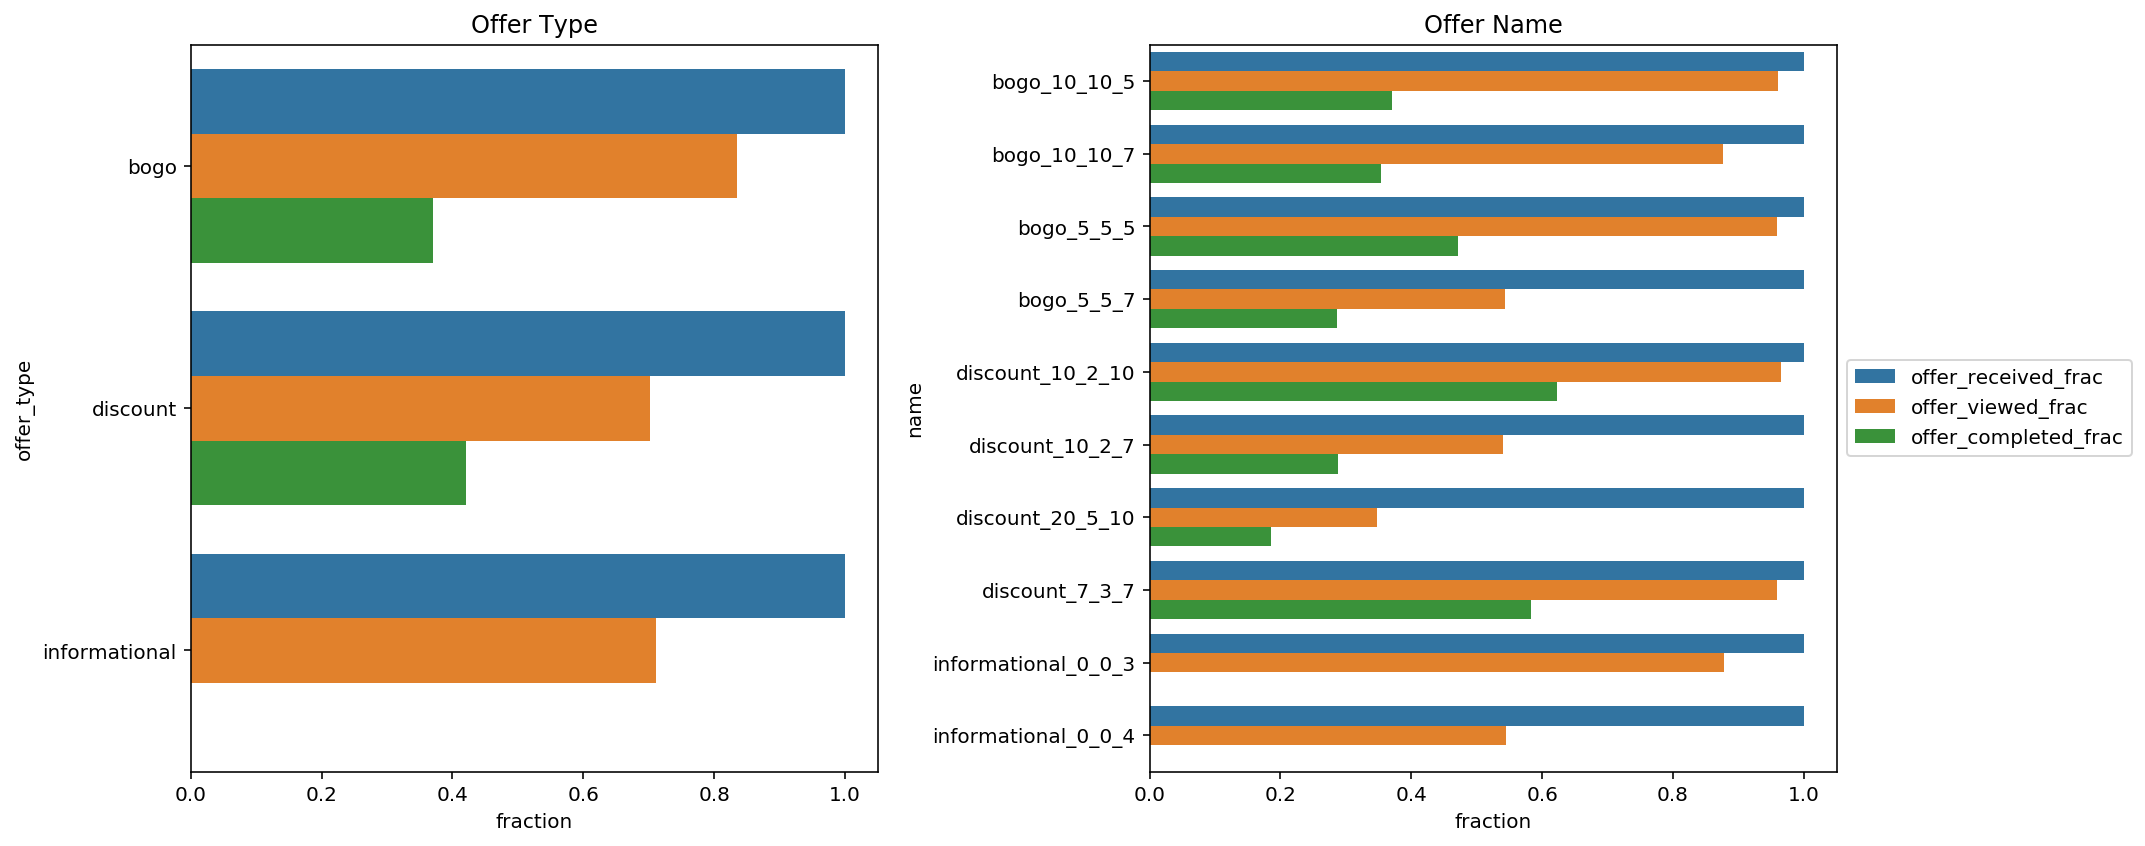

In [20]:
event_count_stack = event_count_frac.stack().reset_index()

f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

# plot offer type

sns.barplot(x=0,y='offer_type', hue='event', data=event_count_stack, ci=None, ax=ax1)
ax1.legend().set_visible(False)
ax1.set_title("Offer Type")
ax1.set_xlabel('fraction')

# plot offer name
sns.barplot(x=0,y='name', hue='event', data=event_count_stack, ax=ax2)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_title("Offer Name")
ax2.set_xlabel('fraction')


#plt.subplots_adjust(top=0.8)
plt.tight_layout()

## Features Extraction

In [8]:
import helpers as h

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

#clean transcript
transcript_clean, transcript_all = h.transcript_preprocessing(transcript, profile, portfolio)

#extract features
profile_updated = h.feature_extraction(transcript_clean,transcript_all,profile, portfolio)

The transcript_clean.csv and transcript_merge.csv file are available at local folder
The profile_updated.csv file is available at local folder.


In [22]:
profile_updated.head()

,gender,age,became_member_on,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,...,rate_offer_completed_viewed_discount_10_2_10,rate_offer_completed_received_discount_10_2_10,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio
68be06ca386d4c31939f3a4f0e3dd783,None,118,2017-02-12,NaN,0.0,0.0,0.0,0.0,1.0,1.0,...,0.5,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.285714
0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
38fe809add3b4fcf9315a9694bb96ff5,None,118,2018-07-12,NaN,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000
78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.333333
a03223e636434f42ac4c3df47e8bac43,None,118,2017-08-04,NaN,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000


In [23]:
profile_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 68be06ca386d4c31939f3a4f0e3dd783 to e4052622e5ba45a8b96b59aba68cf068
Data columns (total 92 columns):
gender                                            14825 non-null object
age                                               17000 non-null int64
became_member_on                                  17000 non-null datetime64[ns]
income                                            14825 non-null float64
offer received_bogo_10_10_7                       17000 non-null float64
offer received_bogo_10_10_5                       17000 non-null float64
offer received_informational_0_0_4                17000 non-null float64
offer received_bogo_5_5_7                         17000 non-null float64
offer received_discount_20_5_10                   17000 non-null float64
offer received_discount_7_3_7                     17000 non-null float64
offer received_discount_10_2_10                   17000 non-null float64
offer received_informational_0_

## Feature Preprocessing

In [9]:
#find missing data
profile_updated.isnull().sum()

gender                                           2175
age                                              0   
became_member_on                                 0   
income                                           2175
offer received_bogo_10_10_7                      0   
                                                ..   
rate_offer_completed_received_bogo_5_5_5         0   
rate_offer_viewed_discount_10_2_7                0   
rate_offer_completed_viewed_discount_10_2_7      0   
rate_offer_completed_received_discount_10_2_7    0   
transaction_completed_ratio                      0   
Length: 92, dtype: int64

In [10]:
col_null = profile_updated.isnull().sum()
col_null_frac = col_null / profile_updated.shape[0]

In [11]:
col_null_frac

gender                                           0.127941
age                                              0.000000
became_member_on                                 0.000000
income                                           0.127941
offer received_bogo_10_10_7                      0.000000
                                                   ...   
rate_offer_completed_received_bogo_5_5_5         0.000000
rate_offer_viewed_discount_10_2_7                0.000000
rate_offer_completed_viewed_discount_10_2_7      0.000000
rate_offer_completed_received_discount_10_2_7    0.000000
transaction_completed_ratio                      0.000000
Length: 92, dtype: float64

Drop columns having more than 50% missing values

In [12]:
cols_to_drop = col_null_frac[col_null_frac > 0.5].index.values
cols_to_drop

array(['bogo_10_10_7_response_time_avg', 'bogo_10_10_5_response_time_avg',
       'bogo_5_5_7_response_time_avg',
       'discount_20_5_10_response_time_avg',
       'discount_7_3_7_response_time_avg',
       'discount_10_2_10_response_time_avg',
       'bogo_5_5_5_response_time_avg',
       'discount_10_2_7_response_time_avg'], dtype=object)

In [14]:
# drop columns in cols_to_drop
profile_updated_ = profile_updated.drop(cols_to_drop, axis=1)

# copy profile with response time 
profile_response_time = profile_updated.copy()

In [15]:
profile_updated_.shape

(17000, 84)

**The data with age > 100 have missing gender and income parameter. These data can be separated to be analyzed separately**

In [16]:
#main profile
profile_updated_main = profile_updated_[profile_updated_.age < 100]

#special profile
profile_updated_sp = profile_updated_[profile_updated_.age >= 100]
profile_updated_sp = profile_updated_sp.drop(['gender', 'income', 'age'], axis=1)

### Separating data into profiles who were influenced by offers (profile_valid) and those who made transactions regardless (profile_invalid)

profile_invalid = value of 1 <br/>
profile_valid = value of 0

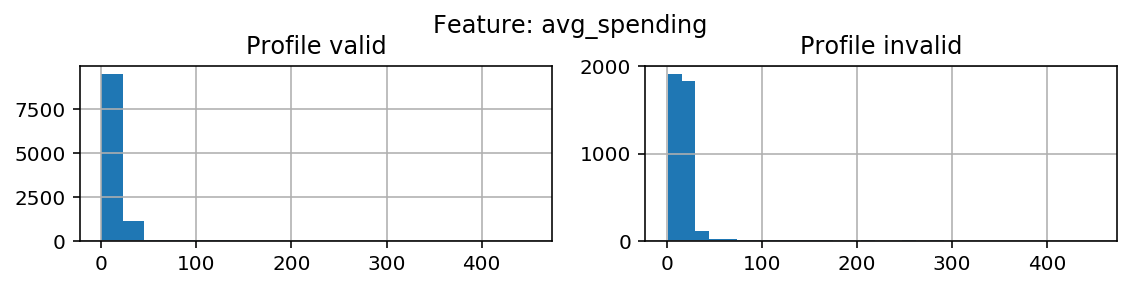

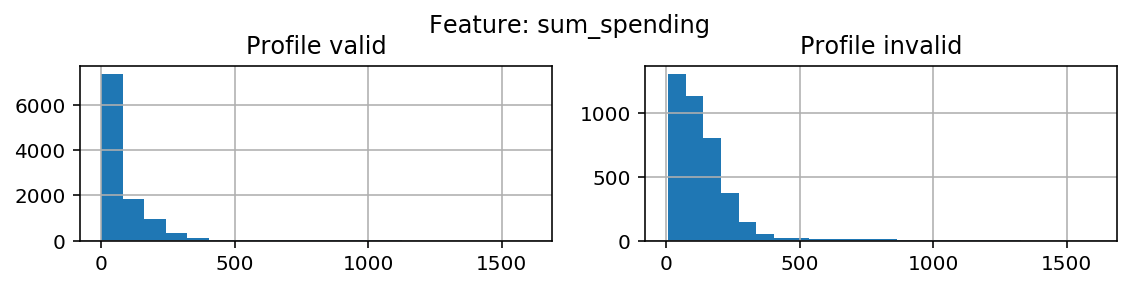

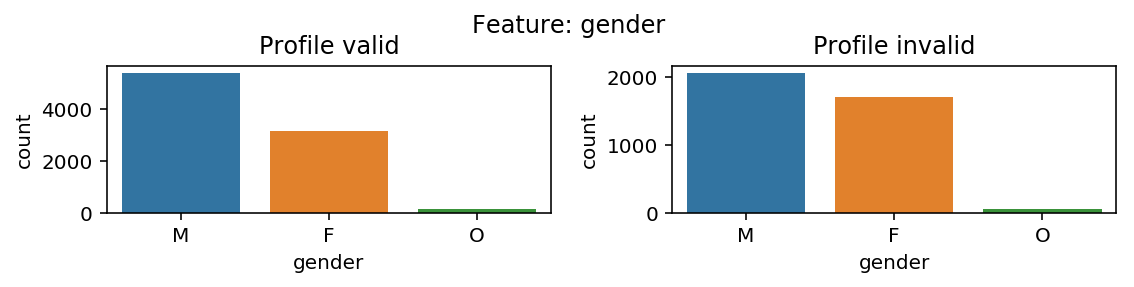

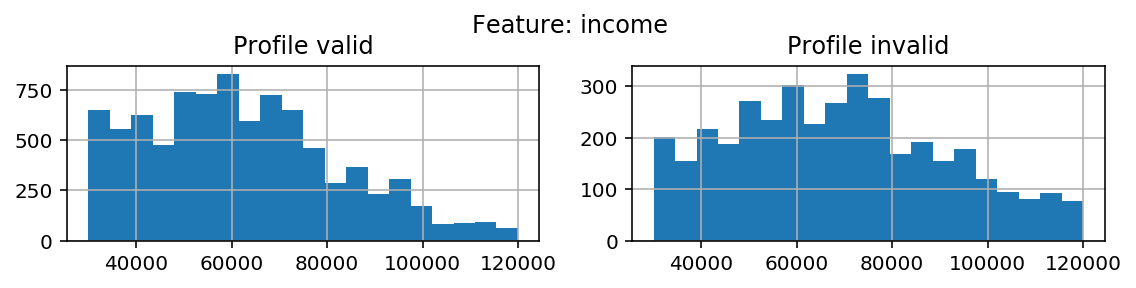

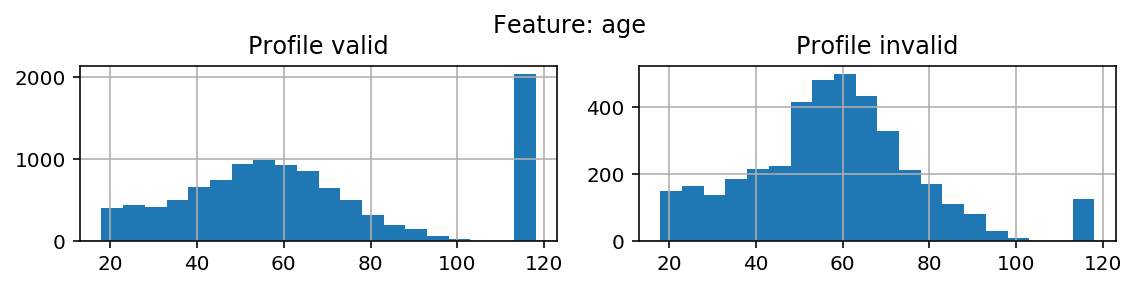

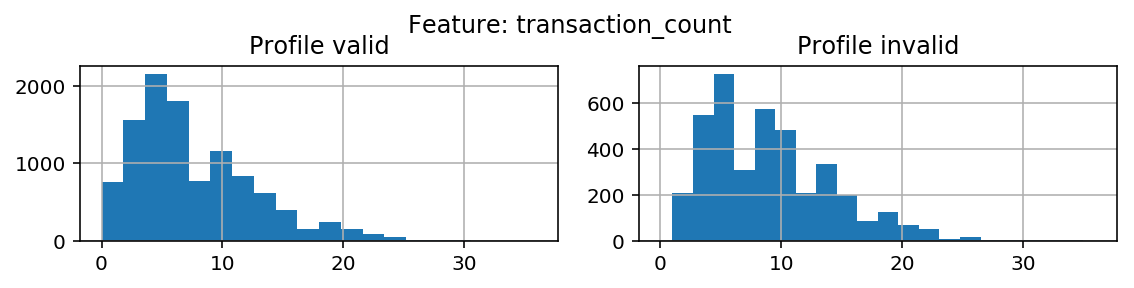

In [17]:
profile_invalid = profile_updated[profile_updated.invalid == 1 ]
profile_valid = profile_updated[profile_updated.invalid == 0]
cols_to_compare = [ 'avg_spending','sum_spending', 'gender','income', 'age', 'transaction_count']

for col in cols_to_compare:
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,2), sharex=True)
    if col == 'gender':
        ax1 = sns.countplot(col, data=profile_valid, ax=ax1, order=['M','F', 'O'])
        ax2 = sns.countplot(col, data=profile_invalid, ax=ax2, order=['M','F', 'O'])
    else:
        ax1 = profile_valid[col].hist(ax=ax1, bins=20)
        ax2 = profile_invalid[col].hist( ax=ax2, bins=20)
    ax1.set_title('Profile valid')
    ax2.set_title('Profile invalid')
    f.suptitle('Feature: ' + col)
    f.tight_layout()
    f.subplots_adjust(top=0.8)

#### Both valid and invalid profiles have similar distribution. The parameter invalid can be used as a feature

### Extracting months and year information from became_member_on feature
The became_member_on needs to be parsed into year and months. It is possible that some people who become member during holiday months are more influenced by offers


In [32]:
profile_updated_['became_member_on'].head()

68be06ca386d4c31939f3a4f0e3dd783   2017-02-12
0610b486422d4921ae7d2bf64640c50b   2017-07-15
38fe809add3b4fcf9315a9694bb96ff5   2018-07-12
78afa995795e4d85b5d9ceeca43f5fef   2017-05-09
a03223e636434f42ac4c3df47e8bac43   2017-08-04
Name: became_member_on, dtype: datetime64[ns]

In [18]:
import datetime

for df in [profile_updated_main, profile_updated_sp]:
    df.loc[:,'member_month'] = df.became_member_on.dt.month.astype(str)
    df.loc[:,'member_year'] = df.became_member_on.dt.year.astype(str)

profile_updated_main = profile_updated_main.drop('became_member_on', axis=1)
profile_updated_sp = profile_updated_sp.drop('became_member_on', axis=1)

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


##### All the columns except some are categorical.Let us one-hot-encode the gender column

In [20]:
# one hot encode gender, year and month features

profile_main = pd.get_dummies(profile_updated_main)

profile_sp = pd.get_dummies(profile_updated_sp)

In [41]:
profile_main.head()

,age,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,offer received_informational_0_0_3,...,member_month_6,member_month_7,member_month_8,member_month_9,member_year_2013,member_year_2014,member_year_2015,member_year_2016,member_year_2017,member_year_2018
0610b486422d4921ae7d2bf64640c50b,55,112000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
78afa995795e4d85b5d9ceeca43f5fef,75,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
e2127556f4f64592b11af22de27a7932,68,70000.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
389bc3fa690240e798340f5a15918d5c,65,53000.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2eeac8d8feae4a8cad5a6af0499a211d,58,51000.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
profile_sp.head()

,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,offer received_informational_0_0_3,offer received_bogo_5_5_5,offer received_discount_10_2_7,...,member_month_6,member_month_7,member_month_8,member_month_9,member_year_2013,member_year_2014,member_year_2015,member_year_2016,member_year_2017,member_year_2018
68be06ca386d4c31939f3a4f0e3dd783,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
38fe809add3b4fcf9315a9694bb96ff5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
a03223e636434f42ac4c3df47e8bac43,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
8ec6ce2a7e7949b1bf142def7d0e0586,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,1,0
68617ca6246f4fbc85e91a2a49552598,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0


### Correlation among some important variables

Text(0.5, 1.0, 'Profile Main - Features Correlation')

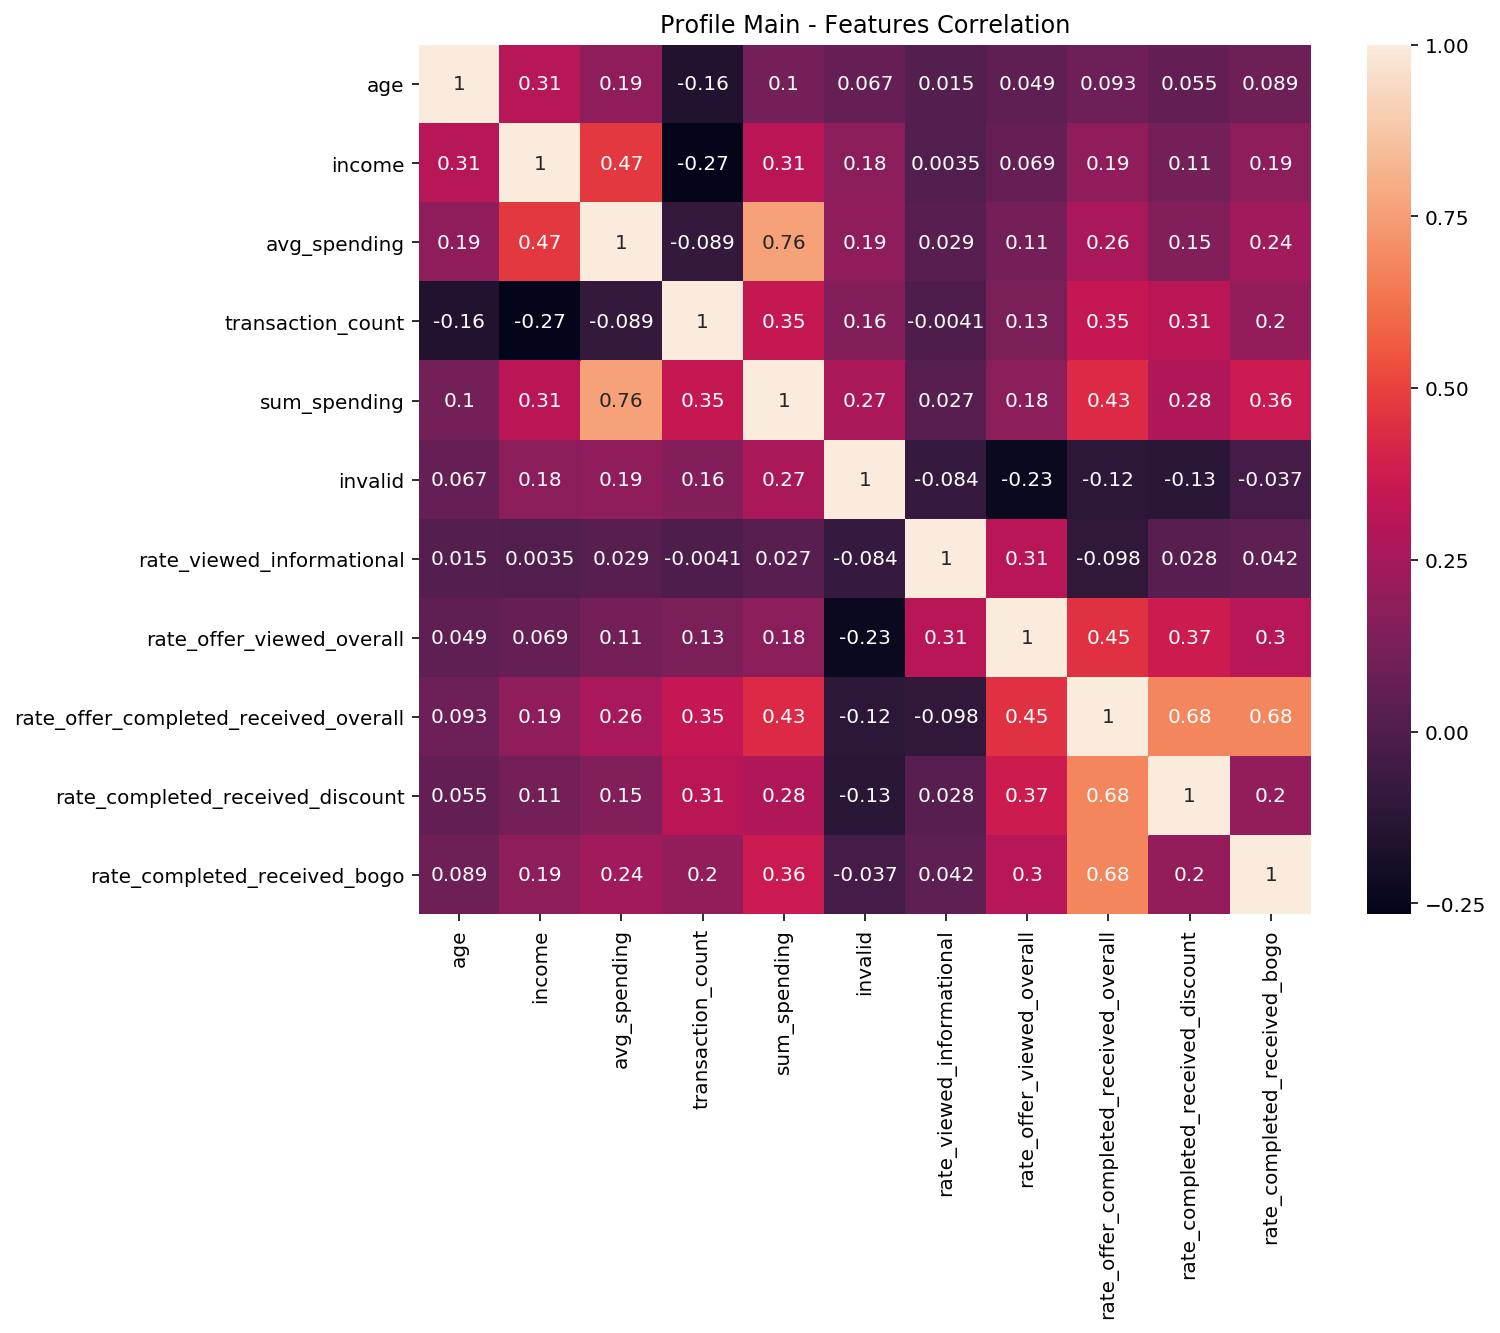

In [45]:
cols = ['age', 'income',  'avg_spending', 'transaction_count', 'sum_spending', 'invalid','rate_viewed_informational',
        'rate_offer_viewed_overall','rate_offer_completed_received_overall',
       'rate_completed_received_discount', 'rate_completed_received_bogo']

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(profile_main[cols].corr(), ax=ax, annot=True)
ax.set_title("Profile Main - Features Correlation")

- Income is postively correlated with `age` and `spending`

- `rate_offer_completed_received_overall` is positively correlated with `income`, `avg_spending`, `transaction_count`, `sum_spending`, and `rate_offer_viewed_overall`. Person with higher income tend to spend more and likely to complete the offer received.

Text(0.5, 1.0, 'Profile Special - Features Correlation')

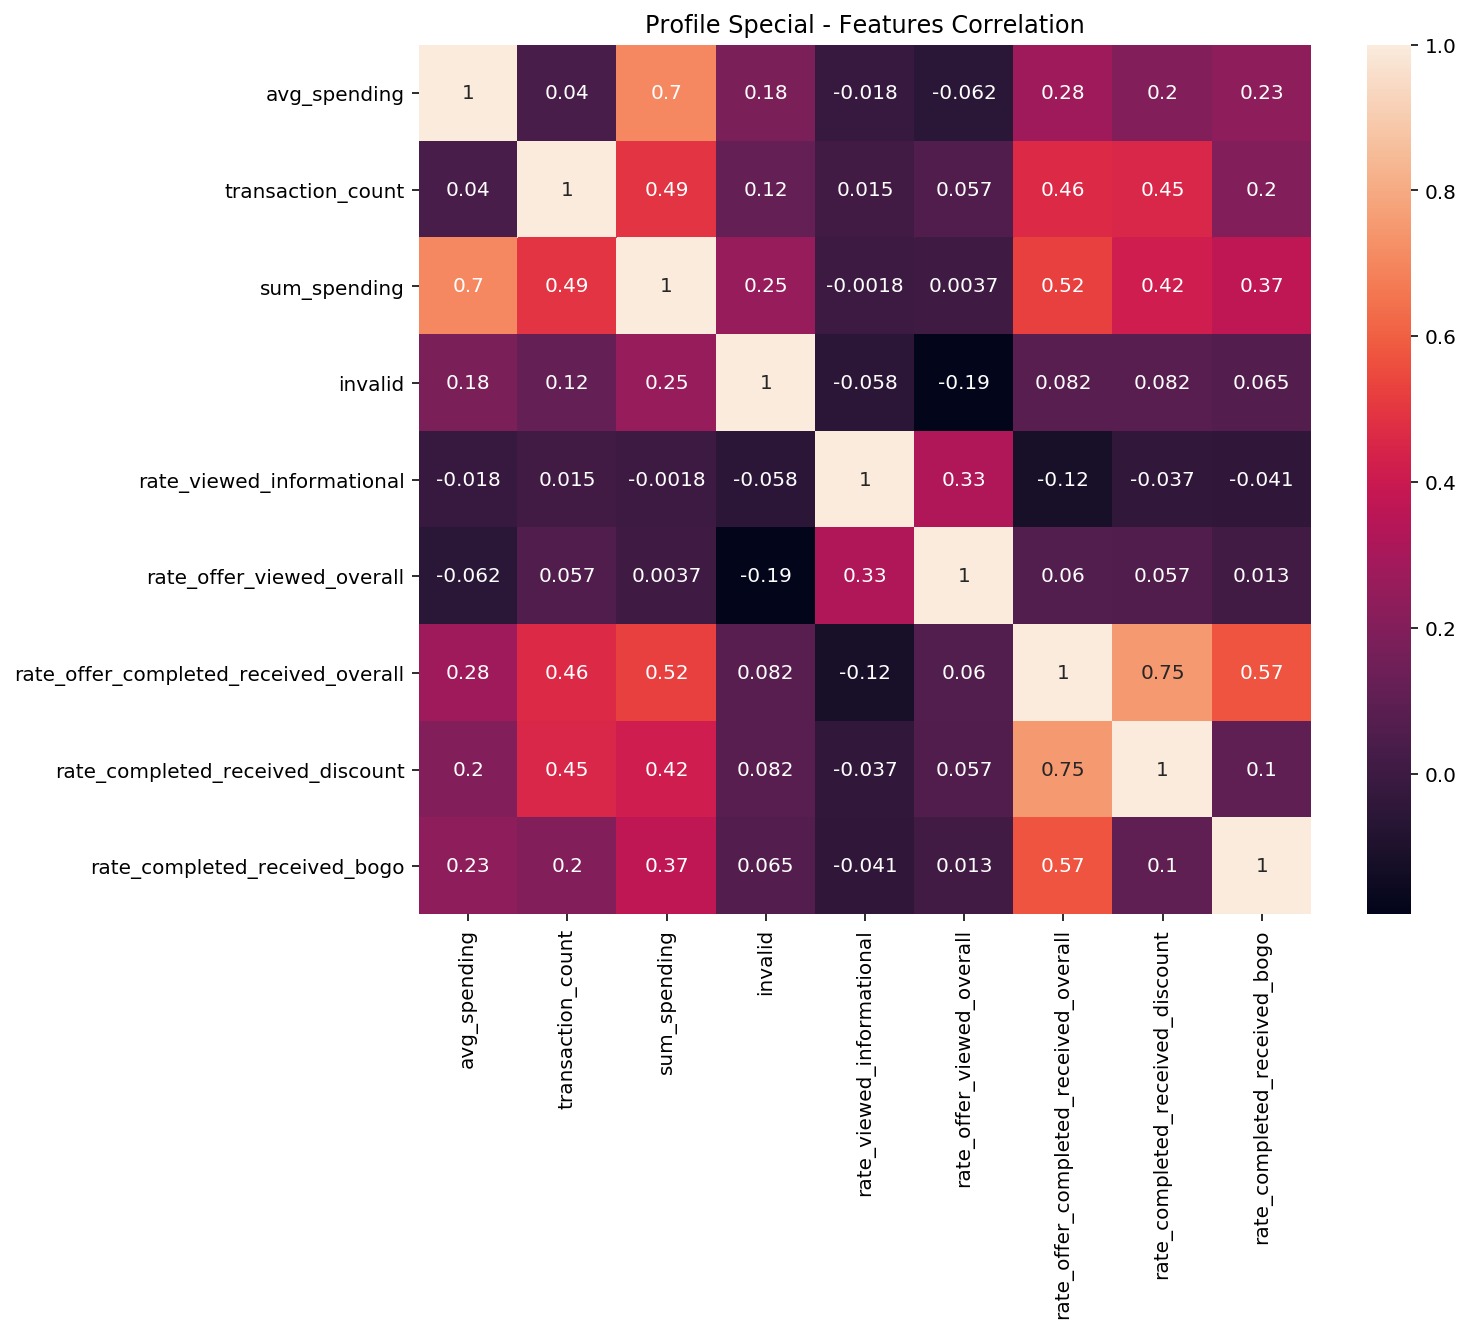

In [21]:
cols = ['avg_spending', 'transaction_count', 'sum_spending', 'invalid','rate_viewed_informational',
        'rate_offer_viewed_overall','rate_offer_completed_received_overall',
       'rate_completed_received_discount', 'rate_completed_received_bogo']

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(profile_sp[cols].corr(), ax=ax, annot=True)
ax.set_title("Profile Special - Features Correlation")

- `avg_spending` is positively correlated with `sum_spending`, profile `invalid`, and likely to have higher rate offer completed.

- `rate_offer_completed_received_overall` is positively correlated with `avg_spending`, `transaction_count`, `sum_spending`, except there is a weaker correlation with `rate_offer_viewed_overall`.

### Comparison of various profiles main vs special and valid vs invalid

Text(0.5, 1.0, 'Main Vs Special Profile')

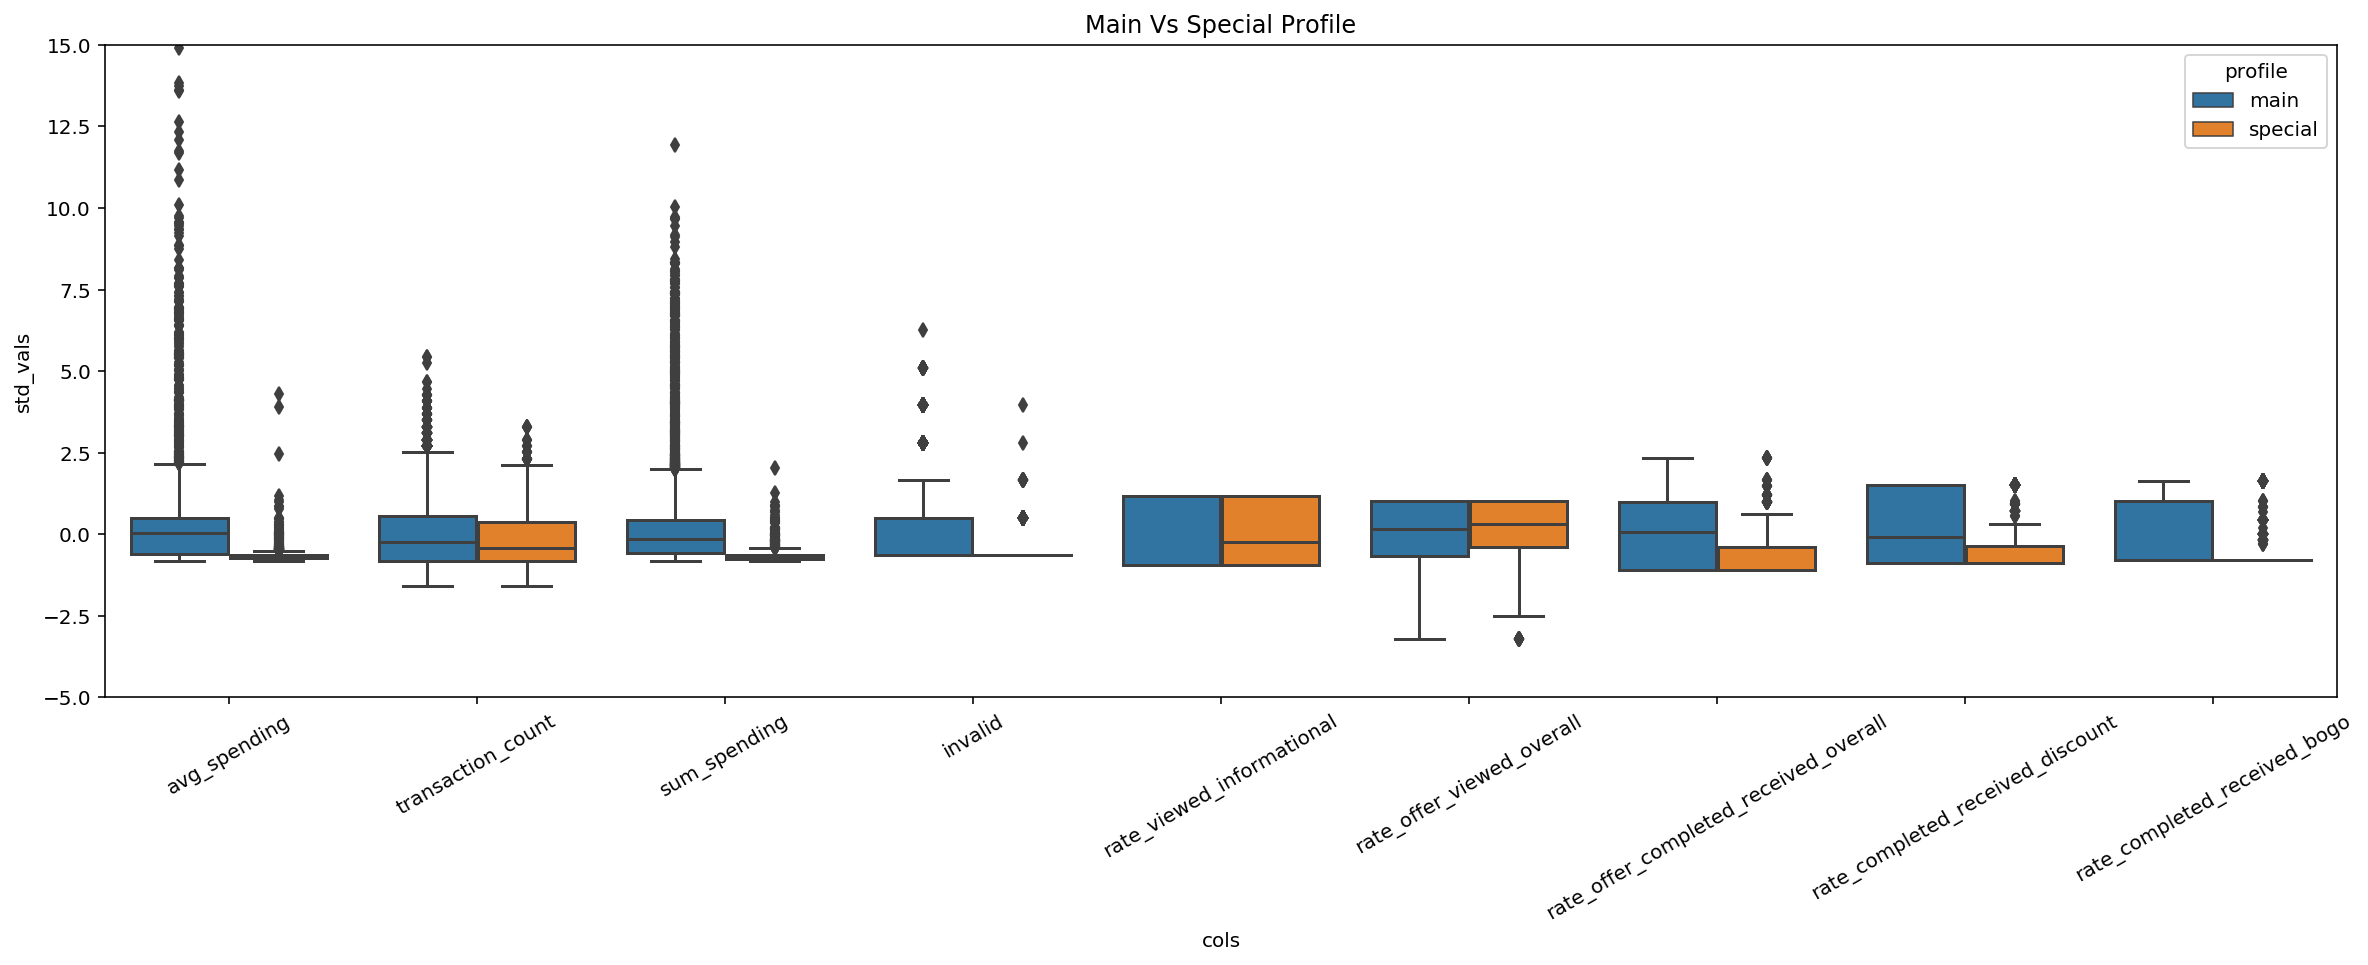

In [22]:
#compare the boxplot main vs special profile
main = profile_main.copy()
special = profile_sp.copy()
main['profile'] = 'main'
special['profile'] = 'special'
merge_df = pd.concat([main, special], axis=0, sort=True)
merge_df_std = (merge_df[cols] - merge_df[cols].mean()) / merge_df[cols].std()
merge_df_std['profile'] = merge_df['profile']
merge_melt = merge_df_std[cols + ['profile']].melt(['profile'], var_name='cols',  value_name='std_vals')


f, ax = plt.subplots(figsize=(20,6))
sns.boxplot('cols','std_vals', hue='profile', data=merge_melt, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);
ax.set_ylim(-5,15);
ax.set_title('Main Vs Special Profile')

## Feature Transformation

### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df):
    scaler = StandardScaler()
    std_arr = scaler.fit_transform(df)
    df_std = pd.DataFrame(std_arr, index=df.index, columns= df.columns)
    return df_std, scaler

profile_std_main, scaler_main = perform_scaling(profile_main)
profile_std_sp, scaler_sp = perform_scaling(profile_sp)

In [50]:
h.save(scaler_main, 'data/scaler_main.sav')
h.save(scaler_sp, 'data/scaler_sp.sav')

## Dimensionality Reduction

In [25]:
from sklearn.decomposition import PCA

pca_main = PCA()
pca_main.fit(profile_std_main)

pca_sp = PCA()
pca_sp.fit(profile_std_sp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

 ## **Plot PCA components**

In [26]:
def scree_plot(pca):
    
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
#     for i in range(num_components):
#         ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

Number of Main PCA components that explained at least 95% variance : 43


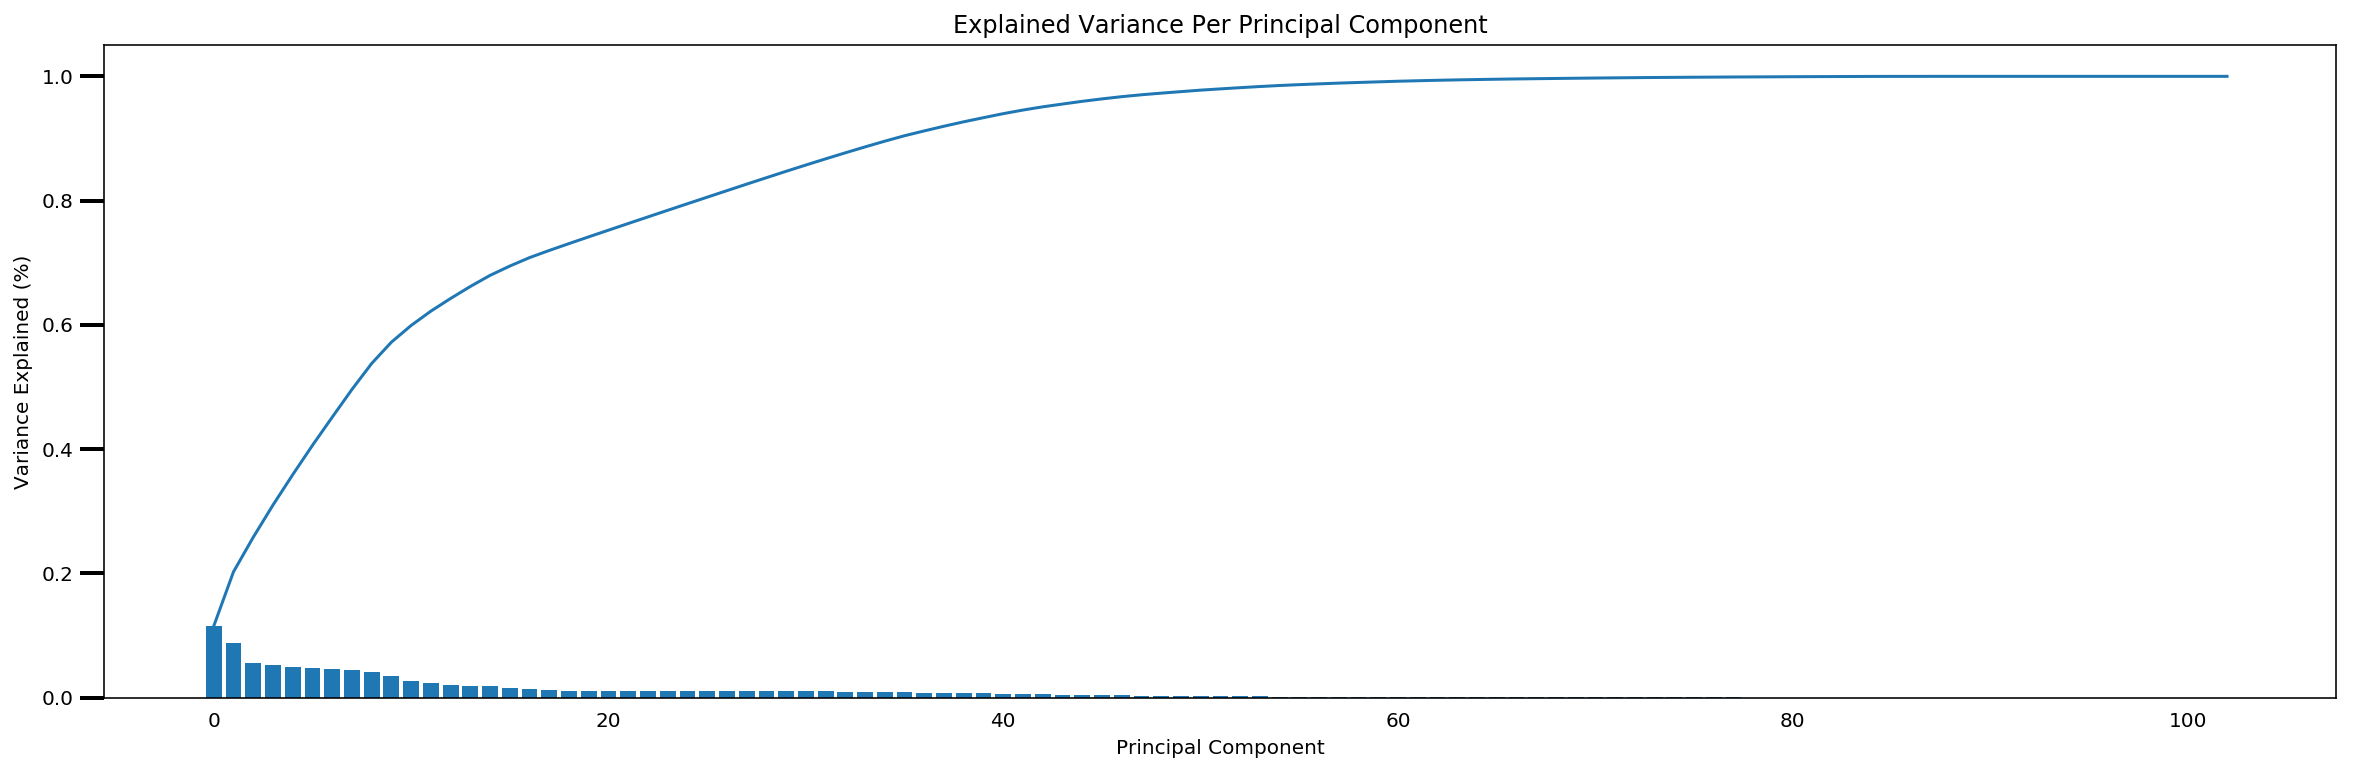

In [27]:
#scree plot for main profile
scree_plot(pca_main)

#PCA
# number of PCA components that explained at least 95% variance ==> 34 components
cumvals = np.cumsum(pca_main.explained_variance_ratio_)
print("Number of Main PCA components that explained at least 95% variance : {}".format(np.where(cumvals >= 0.95)[0][0]+1))

Number of Special PCA components that explained at least 95% variance : 39


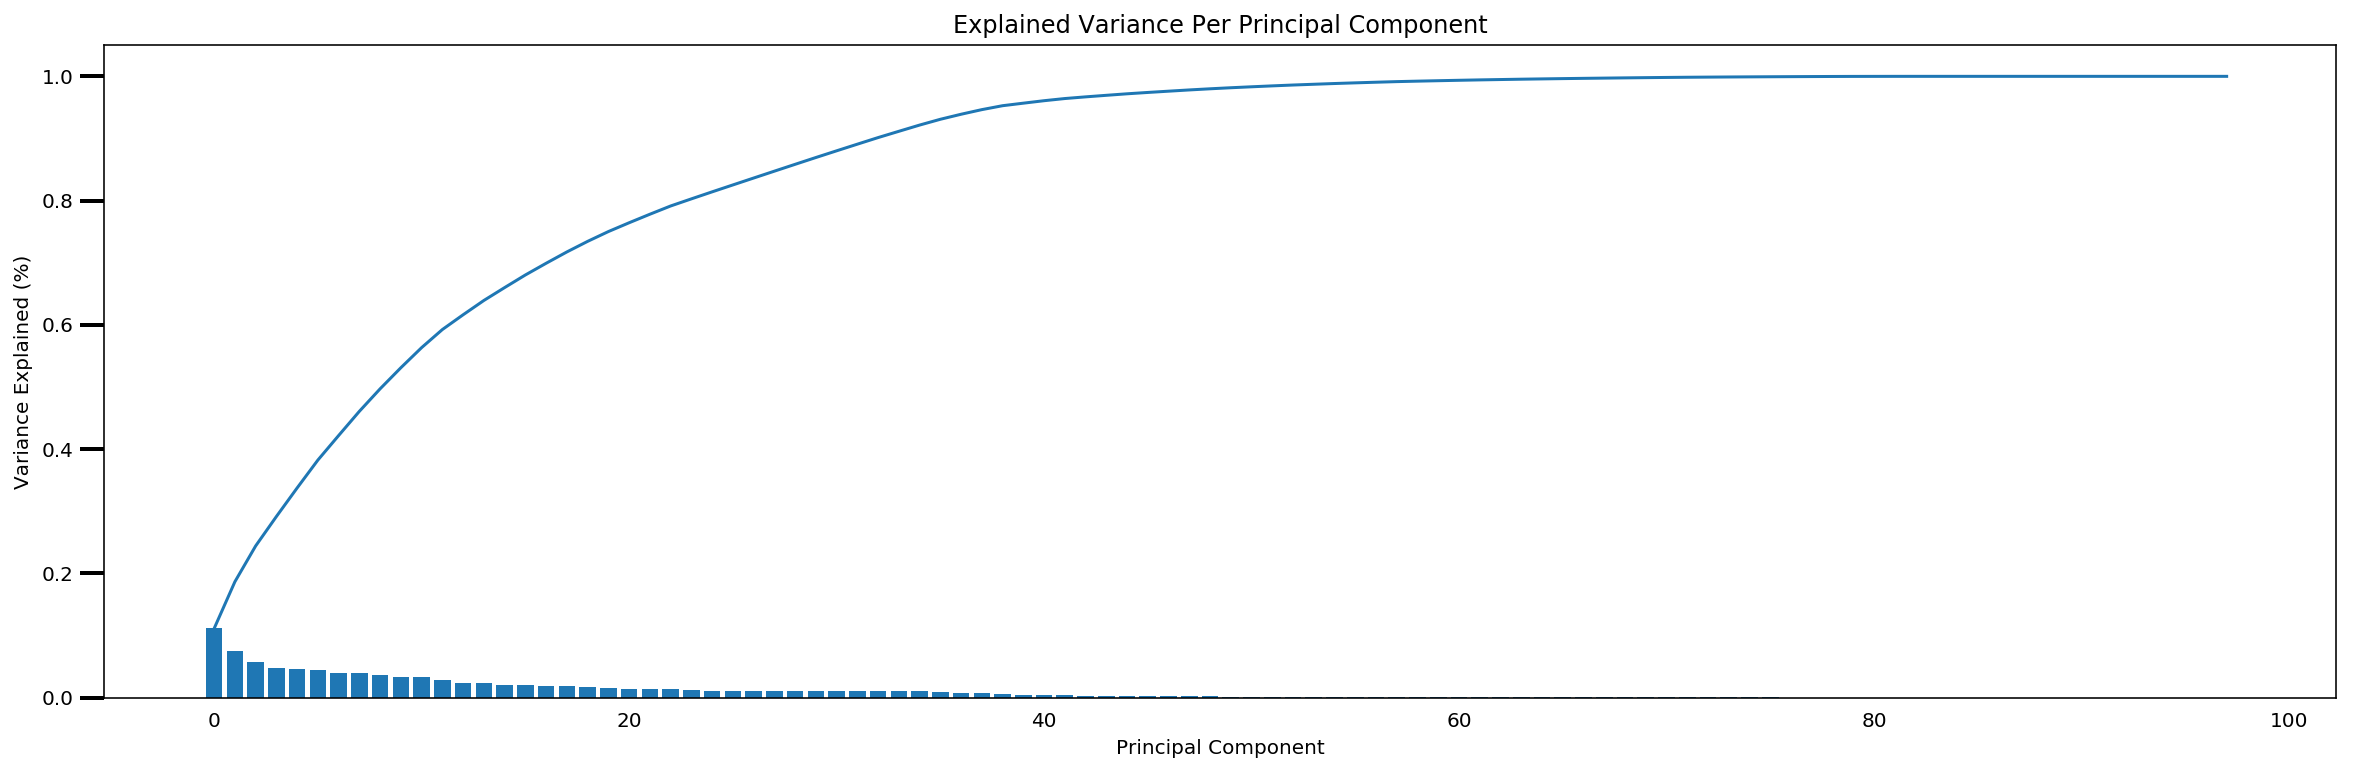

In [28]:
#scree plot for special profile
scree_plot(pca_sp)

#PCA
# number of PCA components that explained at least 95% variance ==> 29 components
cumvals = np.cumsum(pca_sp.explained_variance_ratio_)
print("Number of Special PCA components that explained at least 95% variance : {}".format(np.where(cumvals >= 0.95)[0][0]+1))

In [42]:
#PCA transform with 95% explained variance


def pca_fit_transform(df, var = None):
    pca = PCA(var)
    transform_arr = pca.fit_transform(df)
    return pca, transform_arr

pca_main, pca_transform_main = pca_fit_transform(profile_std_main, var=0.95)
pca_sp, pca_transform_sp = pca_fit_transform(profile_std_sp, var=0.95)

In [43]:
h.save(pca_main, 'data/pca_main.sav')
h.save(pca_sp, 'data/pca_sp.sav')

### Interpret Principal Components

We can now examine the makeup of each PCA component based on the weightings of the original features that are included in the component. 

Note that the components are again ordered from smallest to largest 

In [36]:
def plot_weight(df, pca, ith) :
    '''
    plot weight for the i-th principal component to corresponding feature names
    Input : 
        df = original dataframe
        pca = pca.fit(data)
        ith = int value, from 1 to len(pca.n_components)
    Return : axes of barplot 
    '''
    sort_pca = sorted([(weight, label) for weight,label in zip(pca.components_[ith-1], df.columns) ])
    weights, features = zip(*sort_pca)
    weights, features = list(weights), list(features)
    fig, ax = plt.subplots(figsize=(10,20))
    ax = sns.barplot(weights, features)
    ax.set_title("PCA Component Makeup, Component #" + str(ith))
    ax.set_xlabel("weights")
    ax.set_ylabel("features")
    return ax

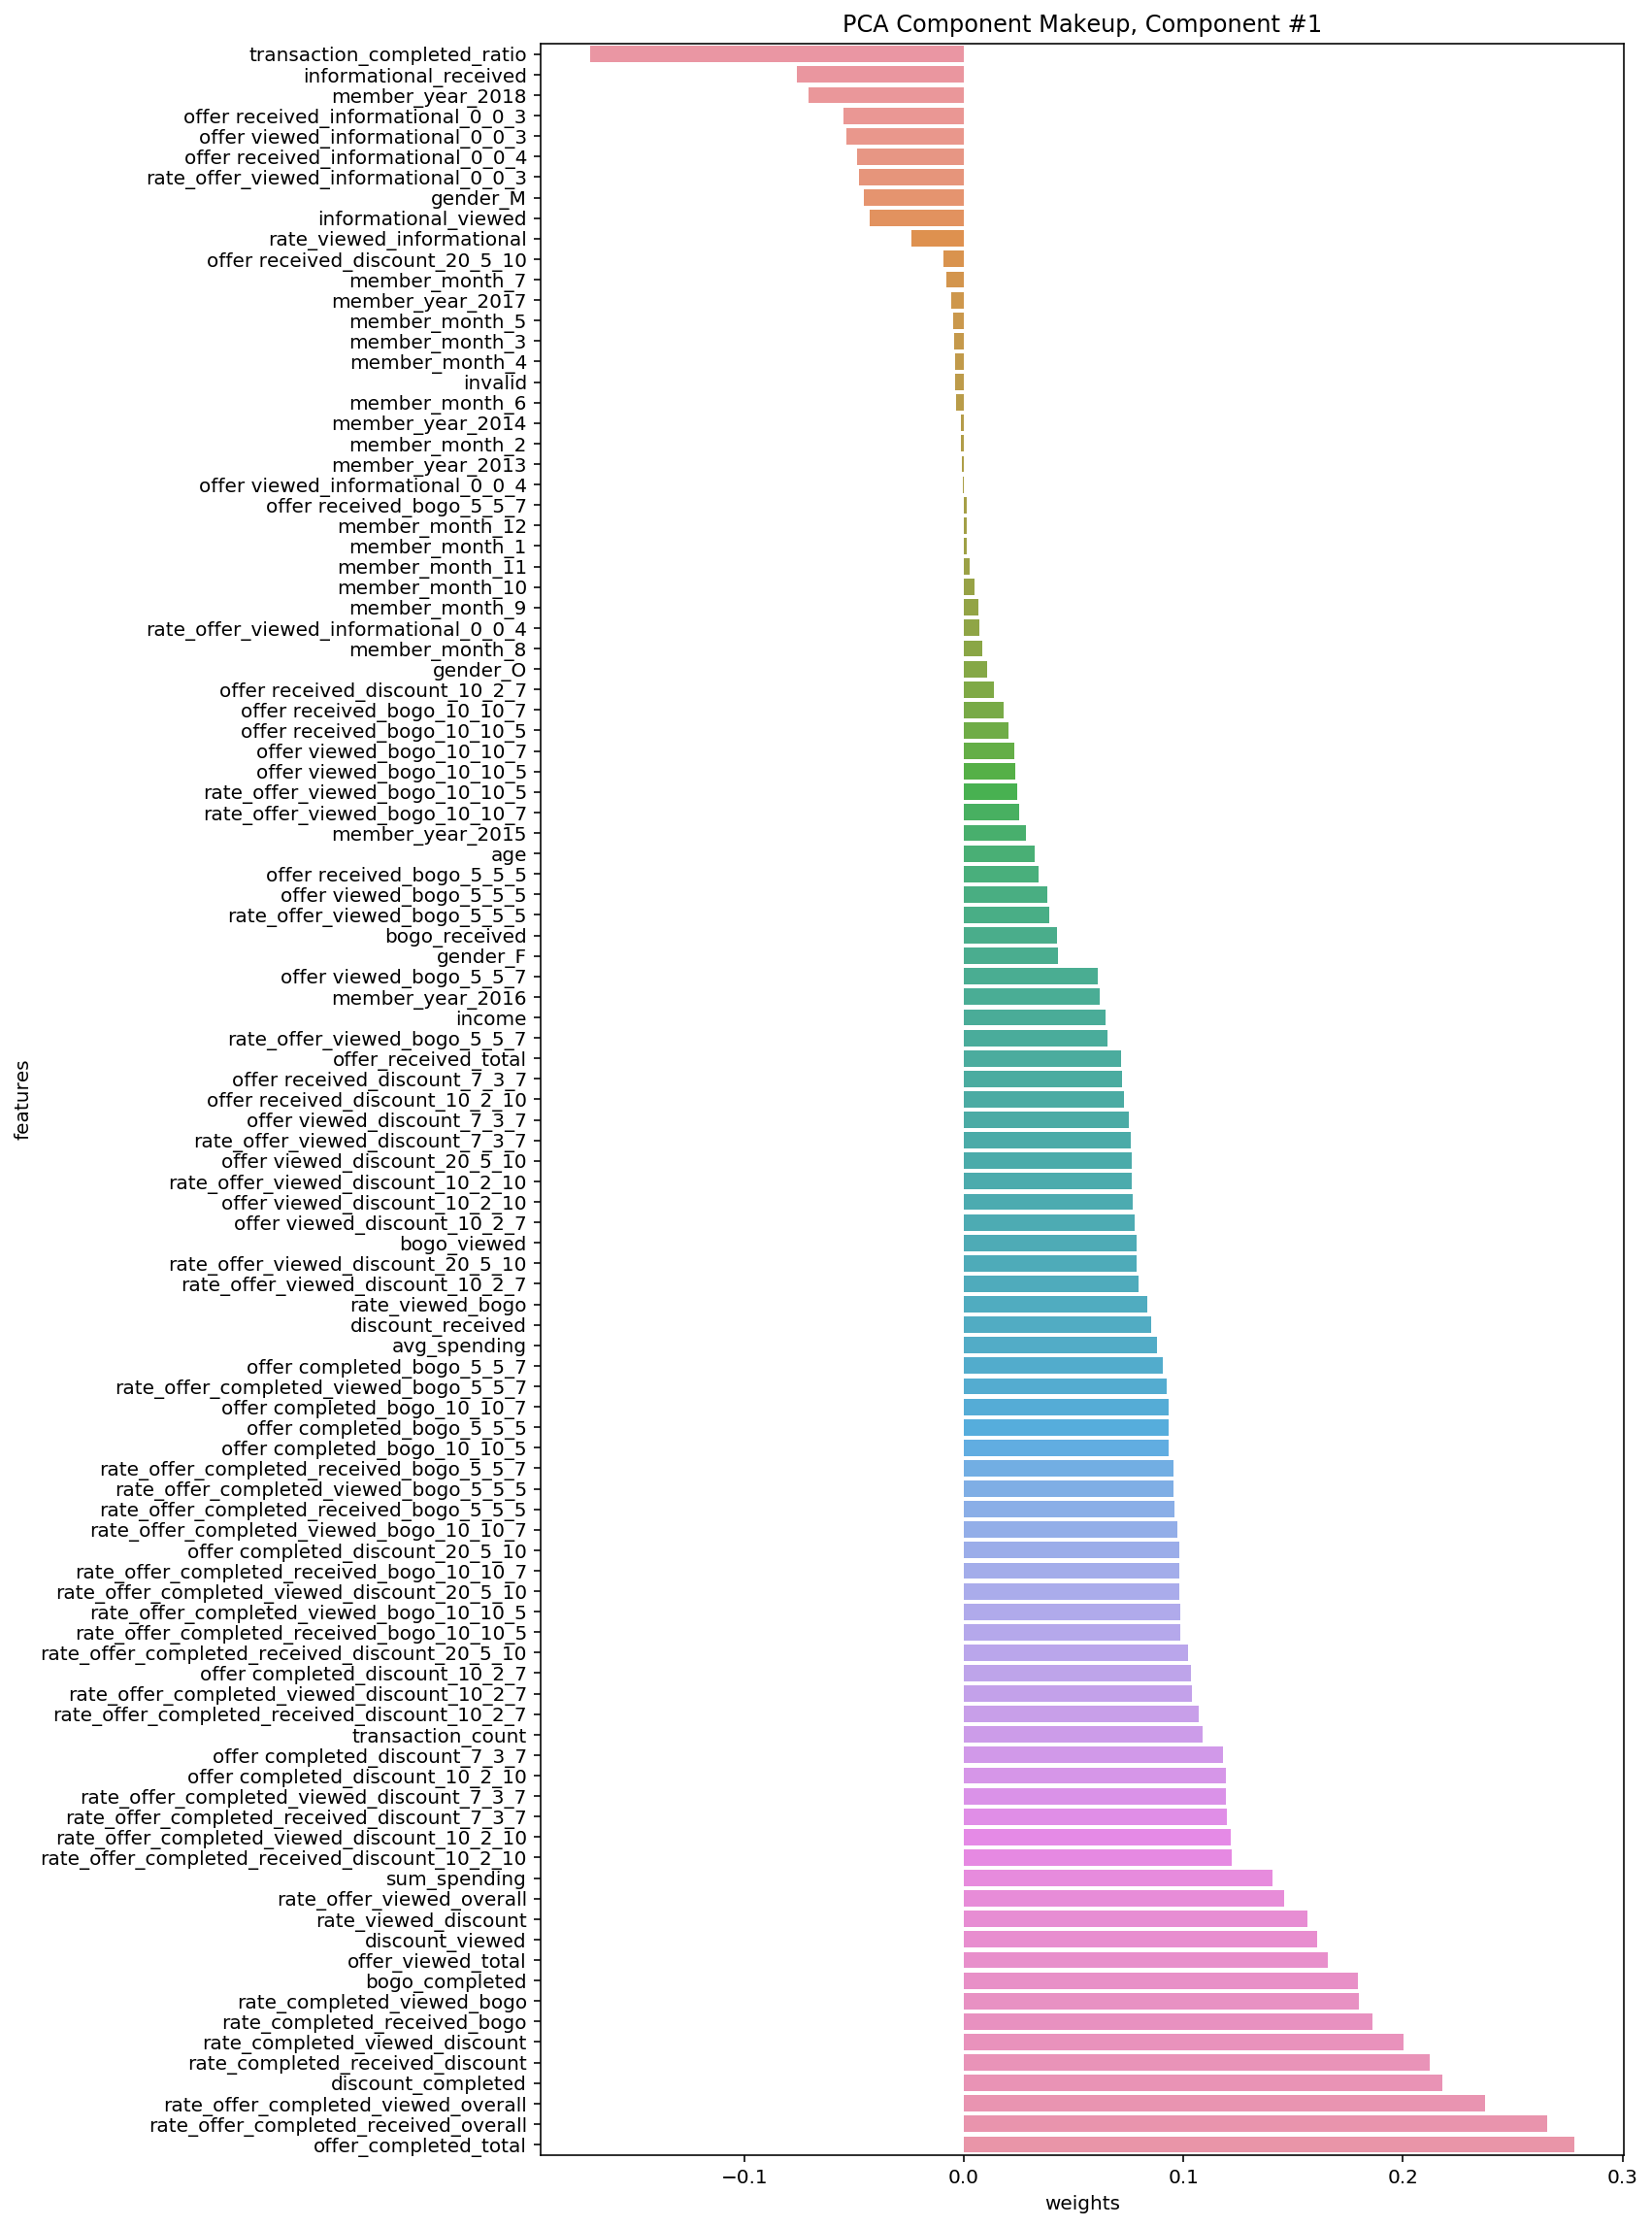

In [37]:
# 1st PCA for Min Profile
plot_weight(profile_std_main,pca_main, 1 )

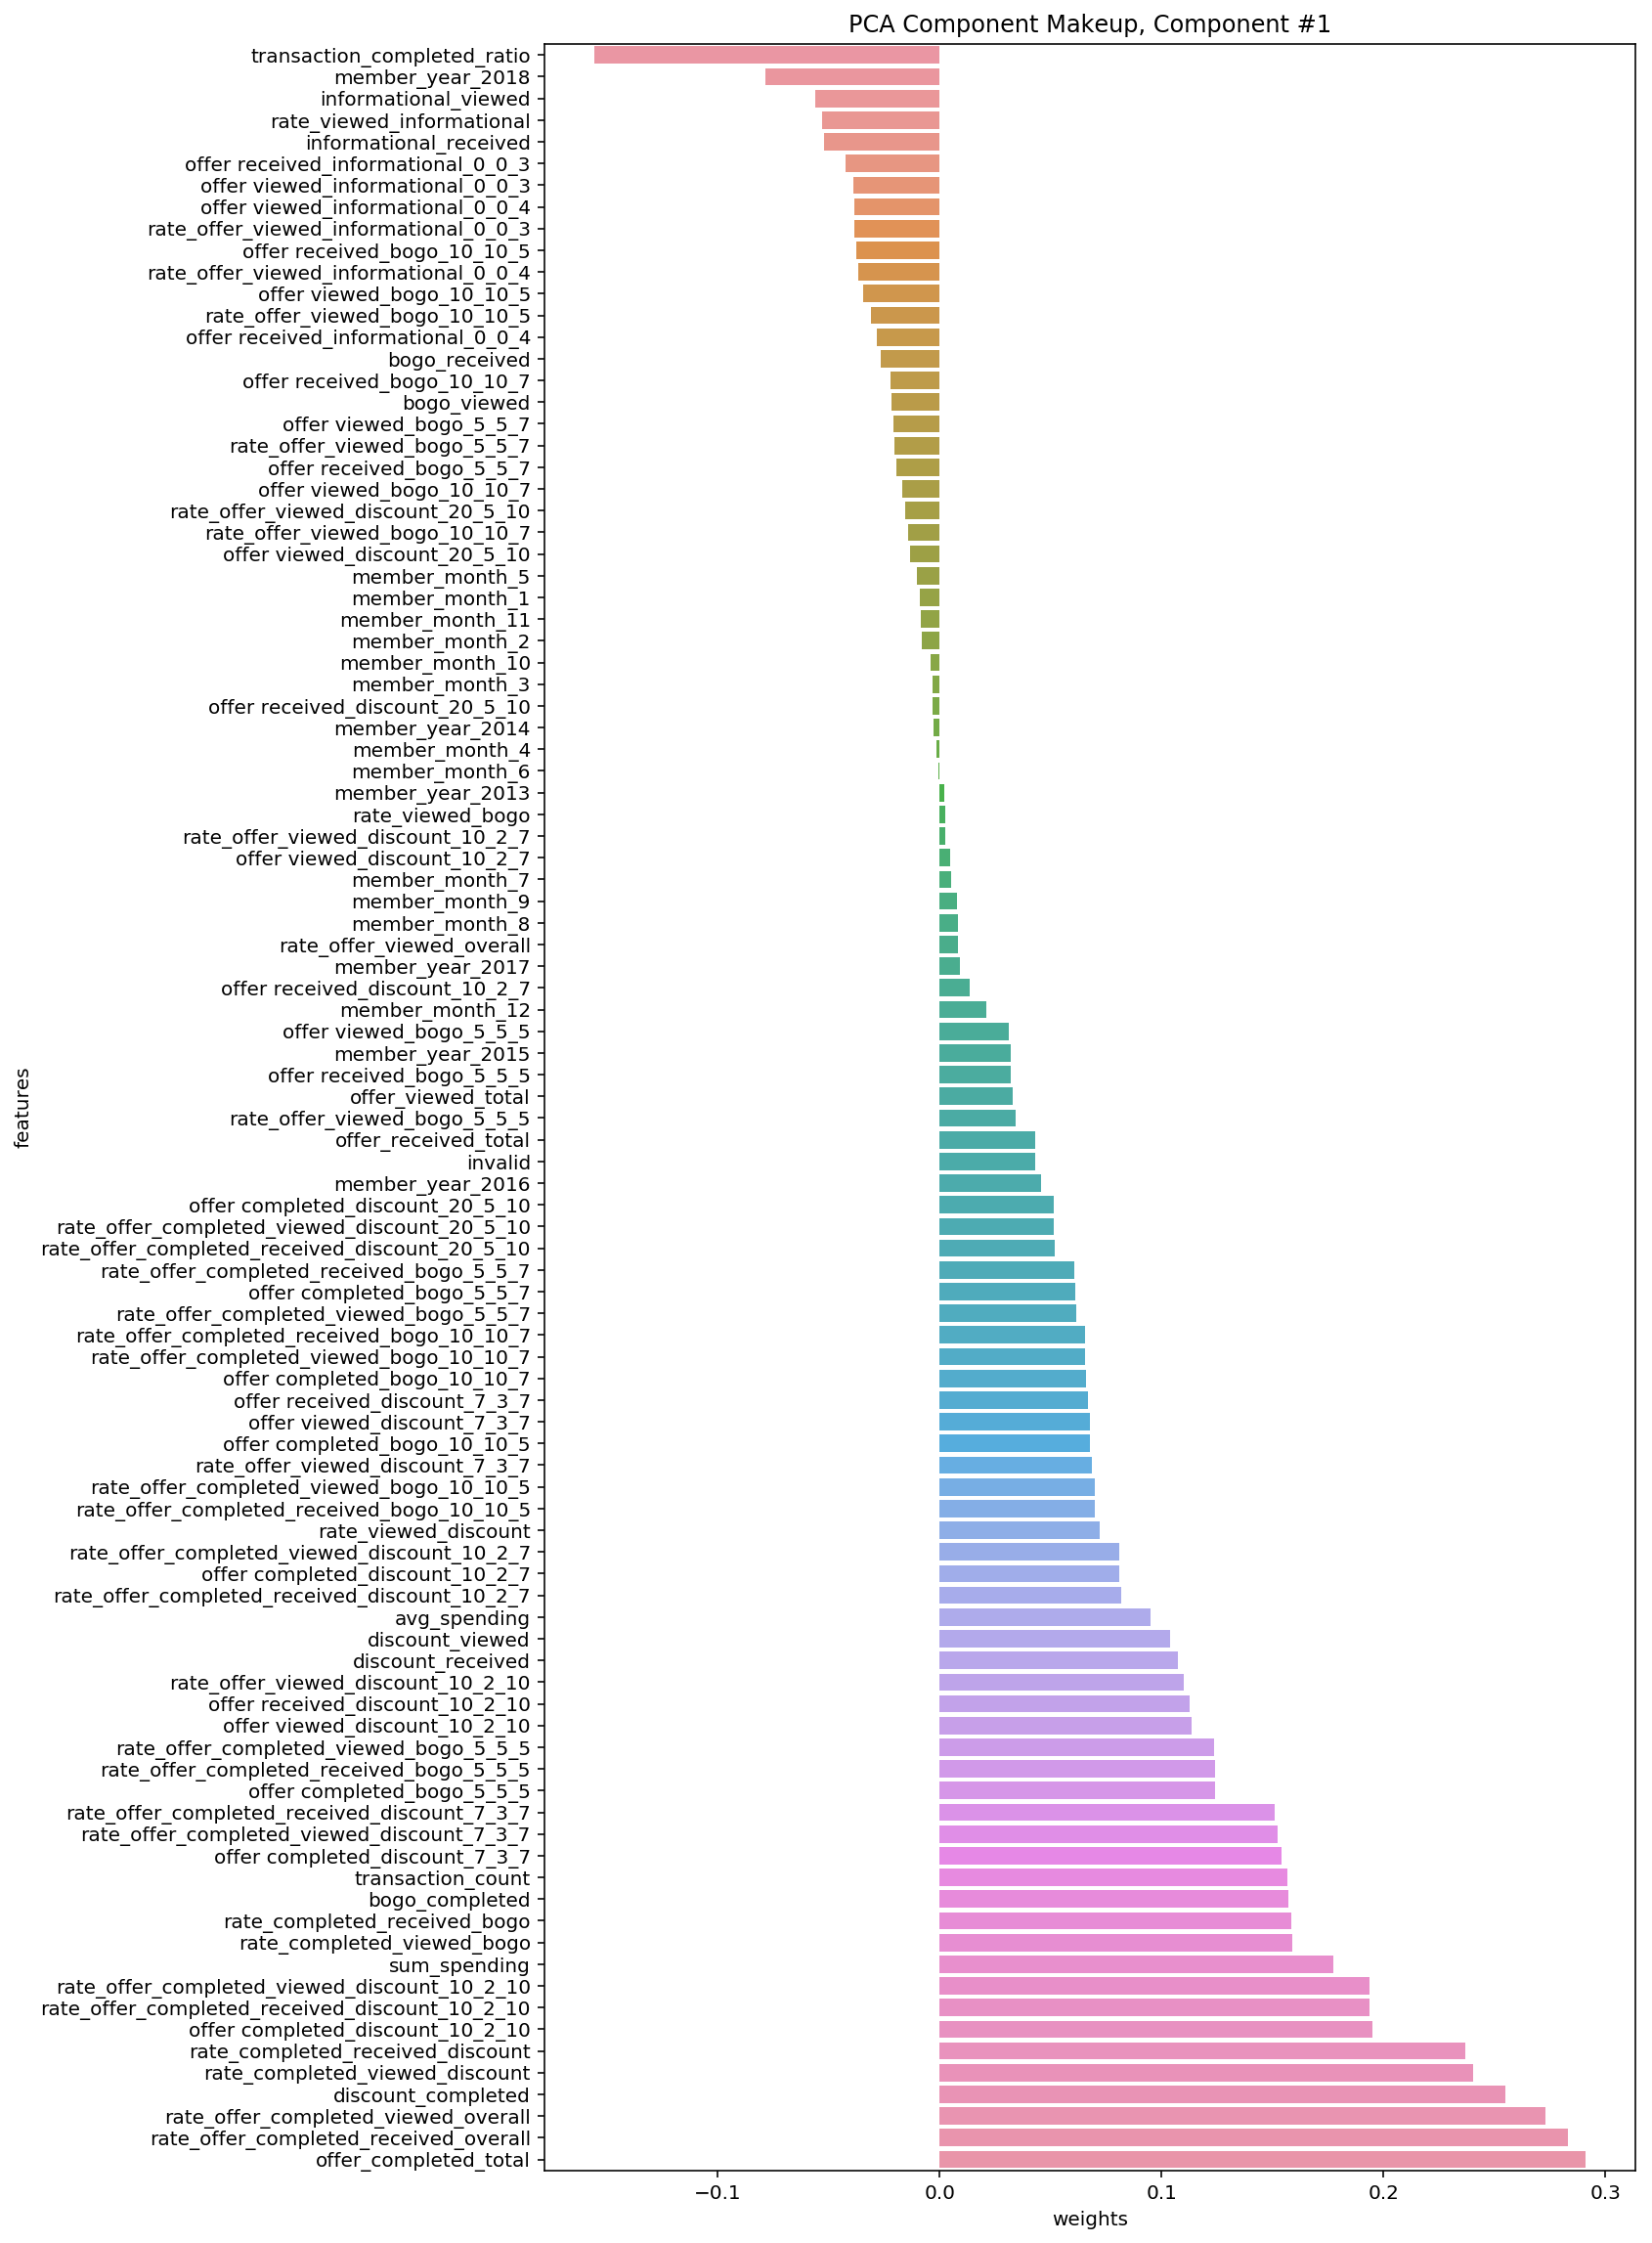

In [38]:
# 1st PCA for Special Profile
plot_weight(profile_std_sp,pca_sp, 1 )

## Unsupervised Machine Learning Model

## Clustering

In [39]:
from sklearn.cluster import KMeans
from tqdm import tqdm

### Finding number of clusters using inertia method

In [44]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import  silhouette_score
from tqdm import tqdm

def finding_num_cluster(X, min_clusters =2, max_clusters =30):
    inertia = []
    clusters = range(min_clusters,max_clusters)
    for n in tqdm(clusters):

        model = KMeans(n_clusters = n, random_state=42)
        preds = model.fit_predict(X)
        inertia.append(model.inertia_)

    fig, ax = plt.subplots(1,1, sharex=False, figsize=(8,7))
    ax.set_xlabel('number of clusters')
    ax.plot(clusters, inertia, marker="o")
    ax.set_ylabel("Inertia (SSE)")
    ax.set_xlabel("number of clusters")
    plt.show()

100%|██████████| 28/28 [01:05<00:00,  2.32s/it]


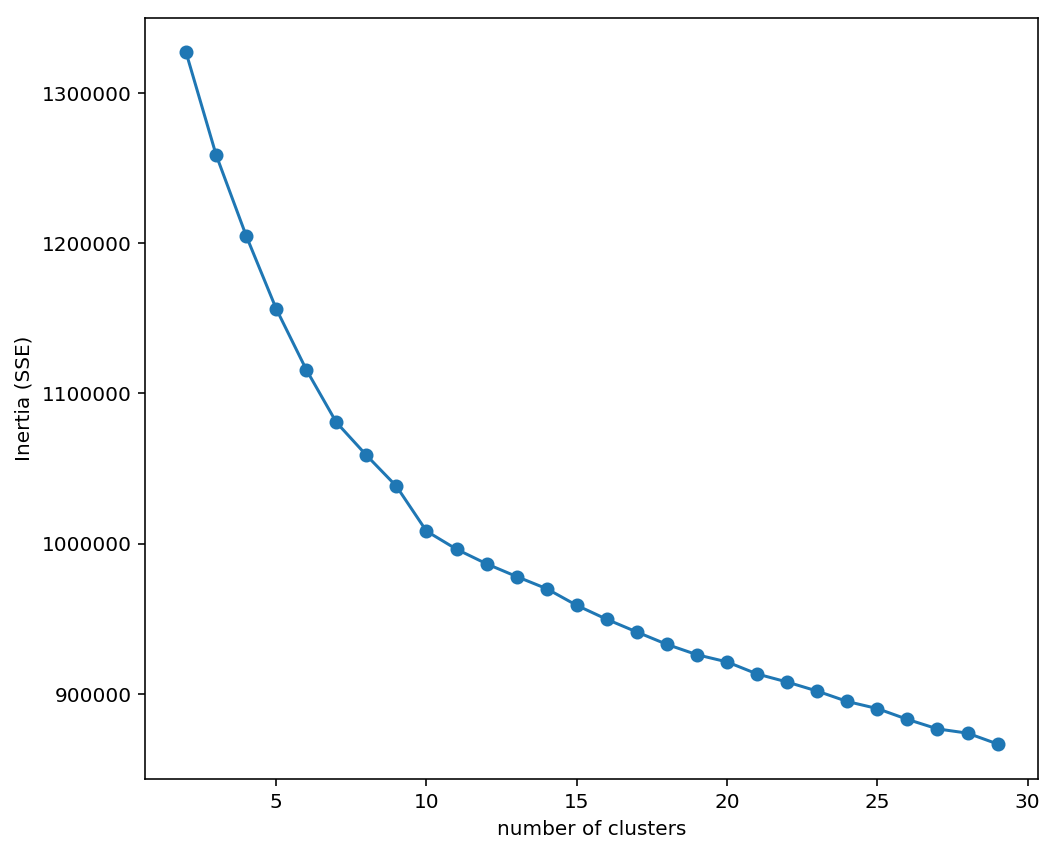

In [45]:
finding_num_cluster(pca_transform_main)

100%|██████████| 28/28 [00:14<00:00,  1.93it/s]


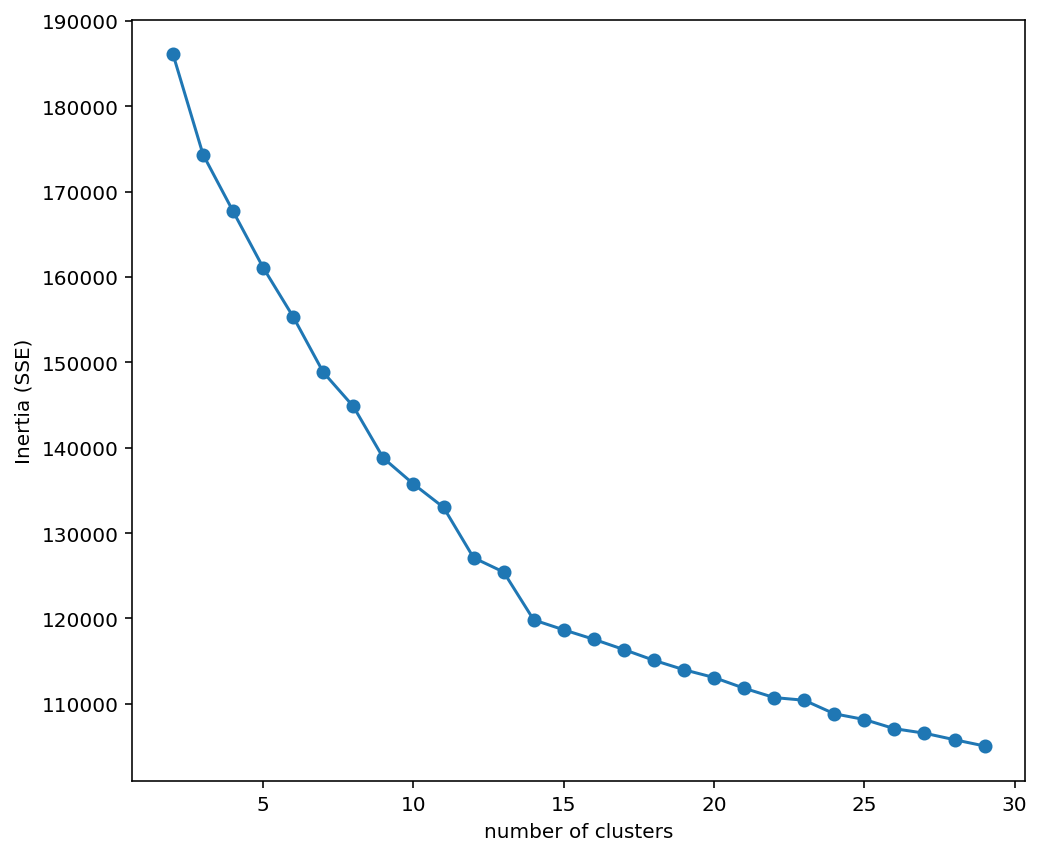

In [46]:
finding_num_cluster(pca_transform_sp)

Although the Elbow curve does not give a clear indication, 10 clusters seems to lower the inertia

### Performing K-means clustering

In [47]:
# clusting the main profile into 10 groups

kmeans_main = KMeans(n_clusters = 10, random_state=40)
preds_main = kmeans_main.fit_predict(pca_transform_main) 
h.save(kmeans_main, 'data/kmeans_main.sav')

#clustering the special profile (with missing gender and income data) into 10 groups
kmeans_sp = KMeans(n_clusters = 10, random_state=40)
preds_sp = kmeans_sp.fit_predict(pca_transform_sp) 
h.save(kmeans_sp, 'data/kmeans_sp.sav')

In [77]:
for class_name, class_count in zip(np.unique(preds_main),np.bincount(preds_main)):
    print(class_name,class_count)

0 1514
1 1348
2 2006
3 1438
4 1416
5 2035
6 1327
7 1146
8 1224
9 1354


In [76]:
for class_name, class_count in zip(np.unique(preds_sp),np.bincount(preds_sp)):
    print(class_name,class_count)

0 138
1 491
2 510
3 212
4 31
5 87
6 459
7 170
8 18
9 76


In [49]:
np.unique(preds_main)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [50]:
#adding cluster information to data
profile_cluster_main = profile_main.copy()
profile_cluster_sp = profile_sp.copy()

profile_cluster_main['cluster'] = preds_main
profile_cluster_sp['cluster'] = preds_sp

In [51]:
#saving the data with cluster information into csv files
profile_cluster_main.to_csv('data/main_cluster.csv')
profile_cluster_sp.to_csv('data/special_cluster.csv')

Text(0.5, 1.0, 'Special Profile Data')

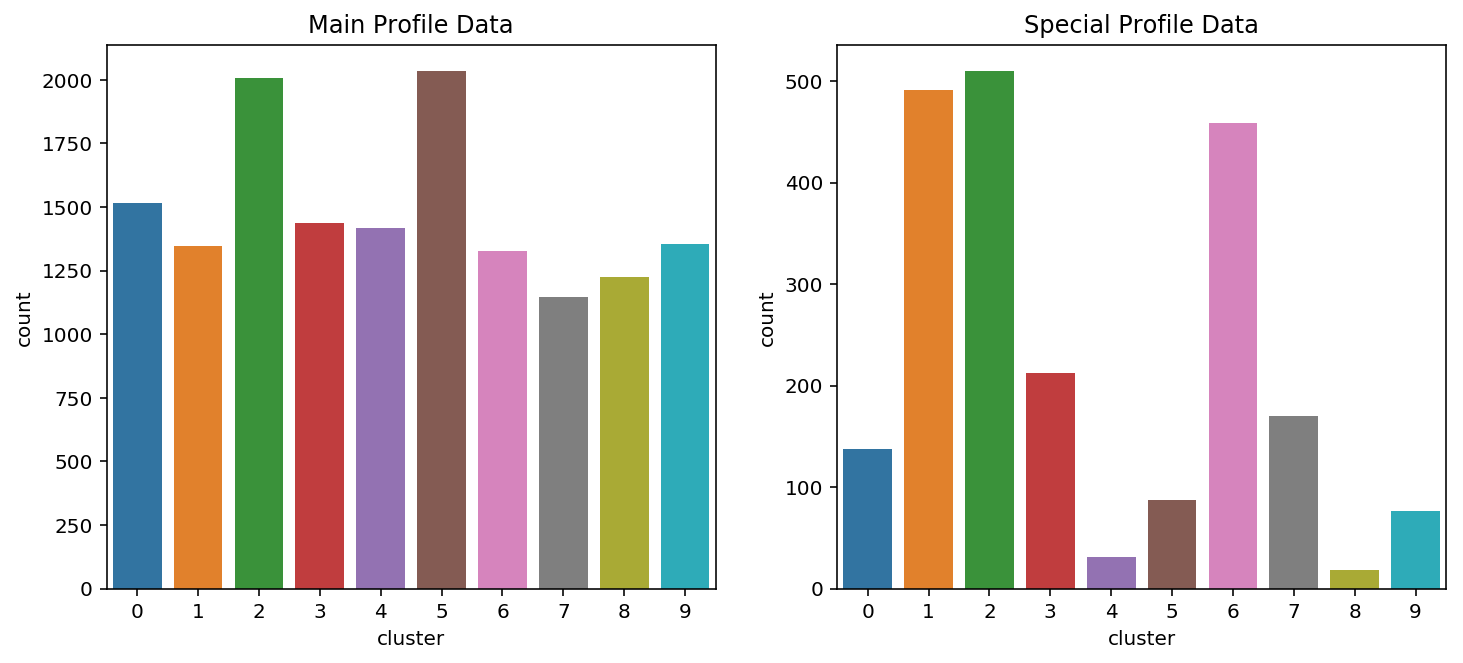

In [52]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(profile_cluster_main['cluster'], ax=ax1)
ax1.set_title('Main Profile Data')

sns.countplot(profile_cluster_sp['cluster'], ax=ax2)
ax2.set_title('Special Profile Data')

### Cluster Analysis on Main Data

In [59]:
""" Cluster Centroid """
"""Convert back from PCA to standard transform to actual values"""

def inverse_transform_centroid(df, kmeans, pca, scaler):
    """ 
    INPUT : 
        df : dataframe
        kmeans : sklearn object of fitted KMeans
        pca : sklearn object of fitted PCA
        scaler : sklearn object of fitted Scaler
    RETURN :
        centers : dataframe of center value each cluster
    """
    centers = kmeans.cluster_centers_
    centers_pca = pca.inverse_transform(centers)
    centers = scaler.inverse_transform(centers_pca)
    centers = pd.DataFrame(centers, columns= df.columns)
    return centers

In [93]:
pd.set_option('display.max_columns', 500)

profile_main_centroid = inverse_transform_centroid(profile_main, kmeans_main, pca_main, scaler_main)
profile_main_centroid

,age,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,offer received_informational_0_0_3,offer received_bogo_5_5_5,offer received_discount_10_2_7,offer viewed_bogo_10_10_7,offer viewed_bogo_10_10_5,offer viewed_informational_0_0_4,offer viewed_bogo_5_5_7,offer viewed_discount_20_5_10,offer viewed_discount_7_3_7,offer viewed_discount_10_2_10,offer viewed_informational_0_0_3,offer viewed_bogo_5_5_5,offer viewed_discount_10_2_7,offer completed_bogo_10_10_7,offer completed_bogo_10_10_5,offer completed_bogo_5_5_7,offer completed_discount_20_5_10,offer completed_discount_7_3_7,offer completed_discount_10_2_10,offer completed_bogo_5_5_5,offer completed_discount_10_2_7,avg_spending,transaction_count,sum_spending,invalid,bogo_received,bogo_viewed,rate_viewed_bogo,bogo_completed,rate_completed_viewed_bogo,rate_completed_received_bogo,discount_received,discount_viewed,rate_viewed_discount,discount_completed,rate_completed_viewed_discount,rate_completed_received_discount,informational_received,informational_viewed,rate_viewed_informational,offer_received_total,offer_viewed_total,offer_completed_total,rate_offer_viewed_overall,rate_offer_completed_received_overall,rate_offer_completed_viewed_overall,rate_offer_viewed_bogo_10_10_7,rate_offer_completed_viewed_bogo_10_10_7,rate_offer_completed_received_bogo_10_10_7,rate_offer_viewed_bogo_10_10_5,rate_offer_completed_viewed_bogo_10_10_5,rate_offer_completed_received_bogo_10_10_5,rate_offer_viewed_informational_0_0_4,rate_offer_viewed_bogo_5_5_7,rate_offer_completed_viewed_bogo_5_5_7,rate_offer_completed_received_bogo_5_5_7,rate_offer_viewed_discount_20_5_10,rate_offer_completed_viewed_discount_20_5_10,rate_offer_completed_received_discount_20_5_10,rate_offer_viewed_discount_7_3_7,rate_offer_completed_viewed_discount_7_3_7,rate_offer_completed_received_discount_7_3_7,rate_offer_viewed_discount_10_2_10,rate_offer_completed_viewed_discount_10_2_10,rate_offer_completed_received_discount_10_2_10,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio,gender_F,gender_M,gender_O,member_month_1,member_month_10,member_month_11,member_month_12,member_month_2,member_month_3,member_month_4,member_month_5,member_month_6,member_month_7,member_month_8,member_month_9,member_year_2013,member_year_2014,member_year_2015,member_year_2016,member_year_2017,member_year_2018
0,52.838688,62521.465829,0.317499,0.313482,0.438727,0.353463,0.385876,1.370582,0.375041,0.391953,0.268363,0.315700,0.254905,0.289717,0.211430,0.076738,0.044036,1.347703,0.358529,0.344027,0.246497,0.087191,0.015414,0.021956,-0.004744,0.002950,1.238023,0.294808,0.034936,0.003738,12.874908,9.480921,106.564778,0.667455,1.252808,0.867857,0.543670,0.067563,0.122080,0.098687,2.447200,1.837459,0.811933,1.539519,0.869228,0.701899,0.830680,0.555457,0.401011,4.530687,3.260772,1.607082,0.725014,0.361402,0.494451,0.231900,0.022483,0.023250,0.255693,0.024160,0.024528,0.176857,0.071429,0.004866,0.003035,0.035760,0.004281,0.003468,1.058046,0.995833,0.980493,0.309354,0.254022,0.251592,0.297892,0.219783,0.036194,0.036339,0.080465,0.010160,0.010725,11.186644,0.382154,0.608608,0.009238,0.100087,0.100293,0.082524,0.096105,0.076048,0.080809,0.067970,0.072572,0.060930,0.075234,0.096365,0.091063,0.024824,0.069967,0.112102,0.209436,0.349567,0.234105
1,54.330931,65993.774510,0.279247,0.232792,0.432183,0.309262,0.377003,0.397867,0.353485,0.435803,1.340699,0.314199,0.227906,0.220219,0.206124,0.101787,0.047510,0.377932,0.338075,0.378336,1.326681,0.089725,0.029806,0.034902,0.016450,-0.001263,0.260868,0.246564,1.202389,0.000776,15.260959,8.949788,125.436983,0.783461,2.1620

In [61]:
""" Standardize Centroid Value """

profile_main_centroid_std = (profile_main_centroid - profile_main_centroid.mean()) / profile_main_centroid.std()

In [80]:
#compare normalized features
def compare_features(df, features, xlabel = 'cluster', ylabel = 'std value', figsize = (10,8)):
    """ This function is just to plot selected features"""
    n_cols = len(features)
    rows = n_cols//2 + (n_cols % 2 >0)
    
    f, axs = plt.subplots(rows,2, figsize=figsize)
    axs = axs.flatten()

    for i in range(n_cols):
        sns.barplot(df.index,features[i], data= df, ax= axs[i])
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
        axs[i].set_title('Feature : ' + features[i])
        
    plt.tight_layout()

In [82]:
#compare un-normalized features
def compare_features_(df, features, xlabel = 'cluster', ylabel = 'Value', figsize = (10,8)):
    """ This function is just to plot selected features"""
    n_cols = len(features)
    rows = n_cols//2 + (n_cols % 2 >0)
    
    f, axs = plt.subplots(rows,2, figsize=figsize)
    axs = axs.flatten()

    for i in range(n_cols):
        sns.barplot(df.index,features[i], data= df, ax= axs[i])
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
        axs[i].set_title('Feature : ' + features[i])
        
    plt.tight_layout()

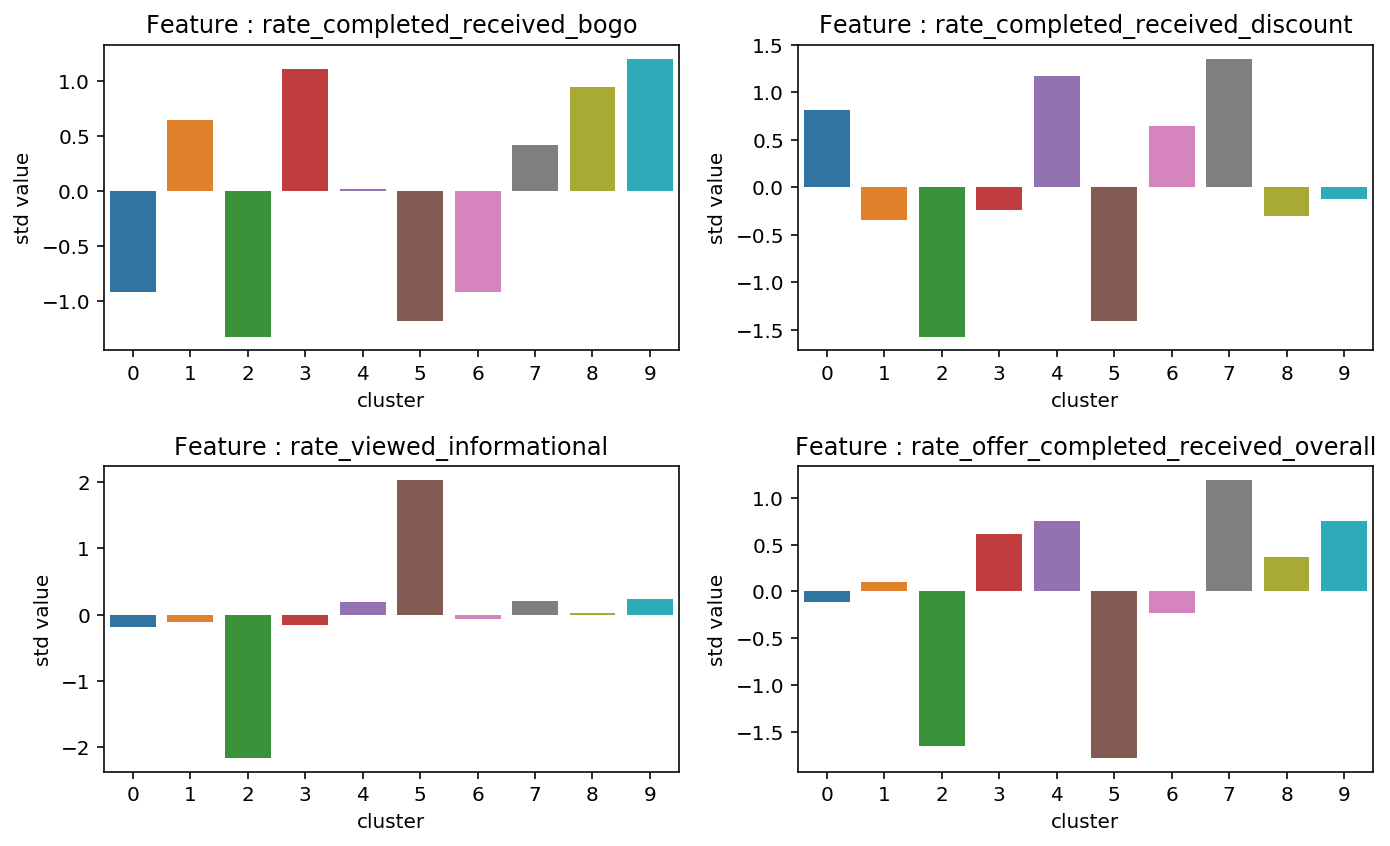

In [65]:
""" Visualize completed rate for each offer and cluster"""

features = [
    'rate_completed_received_bogo',
    'rate_completed_received_discount',
    'rate_viewed_informational',  'rate_offer_completed_received_overall']

compare_features(profile_main_centroid_std, features, figsize=(10,6))

#### Most Responsive clusters
* Offer completed overall - clusters 3,4,7,8,9
* BOGO - clusters 1,3,7,8,9
* DISCOUNT - clusters 0,4,6,7
* INFORMATIONAL - clusters 5,7,9


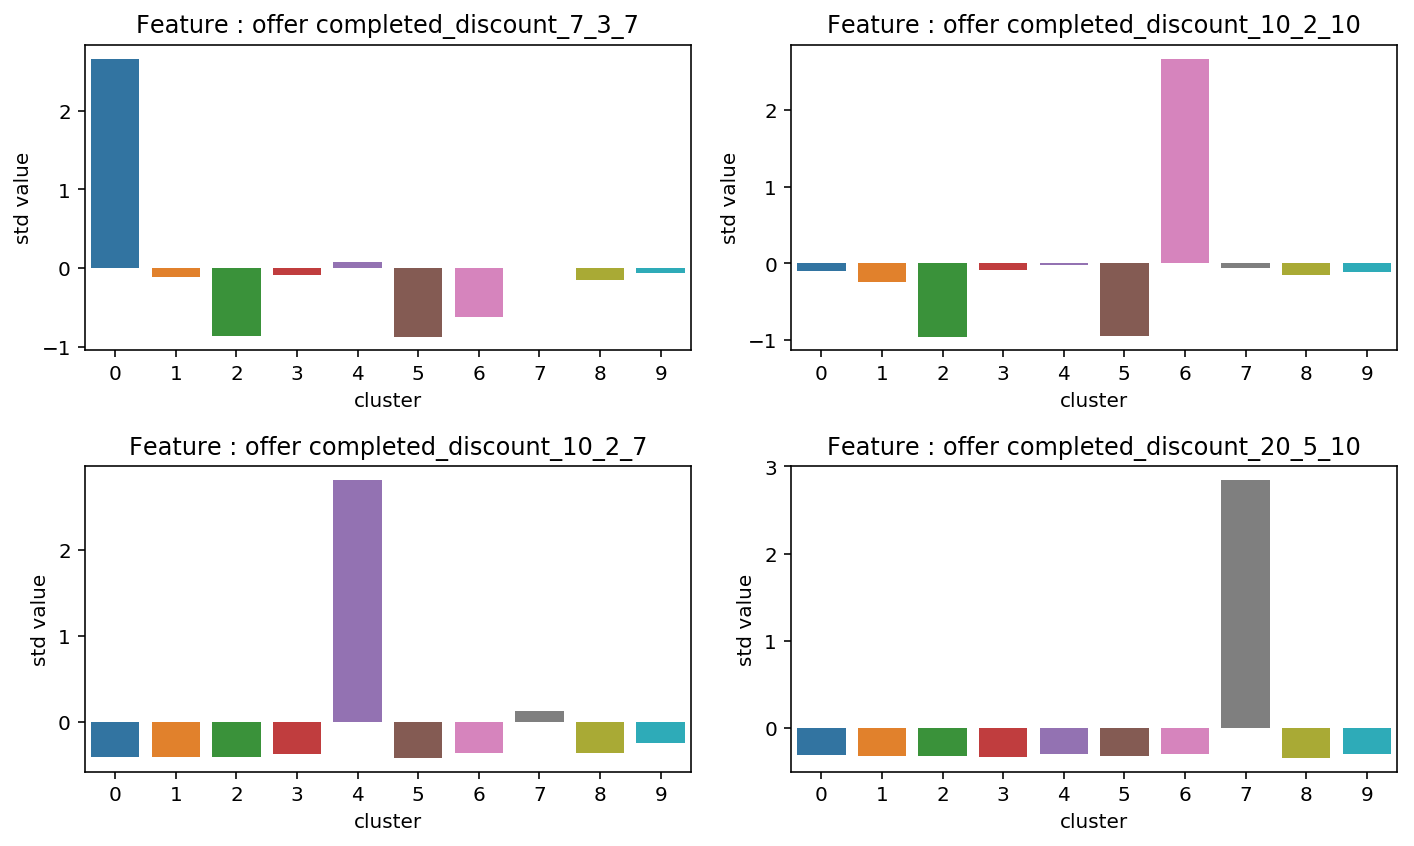

In [84]:
""" Visualize DISCOUNTS """

features = [
    'offer completed_discount_7_3_7',
    'offer completed_discount_10_2_10',
    'offer completed_discount_10_2_7',
    'offer completed_discount_20_5_10']

compare_features(profile_main_centroid_std, features, figsize=(10,6))

### DISCOUNT CLUSTERS
* **cluster 0** - very responsive to difficulty 7
* **cluster 6** - very responsive to diffuculty 10
* **clusters 0 and 10** - very responsive to diffuculty 10
* **cluster 7** - very responsive to difficulty 20

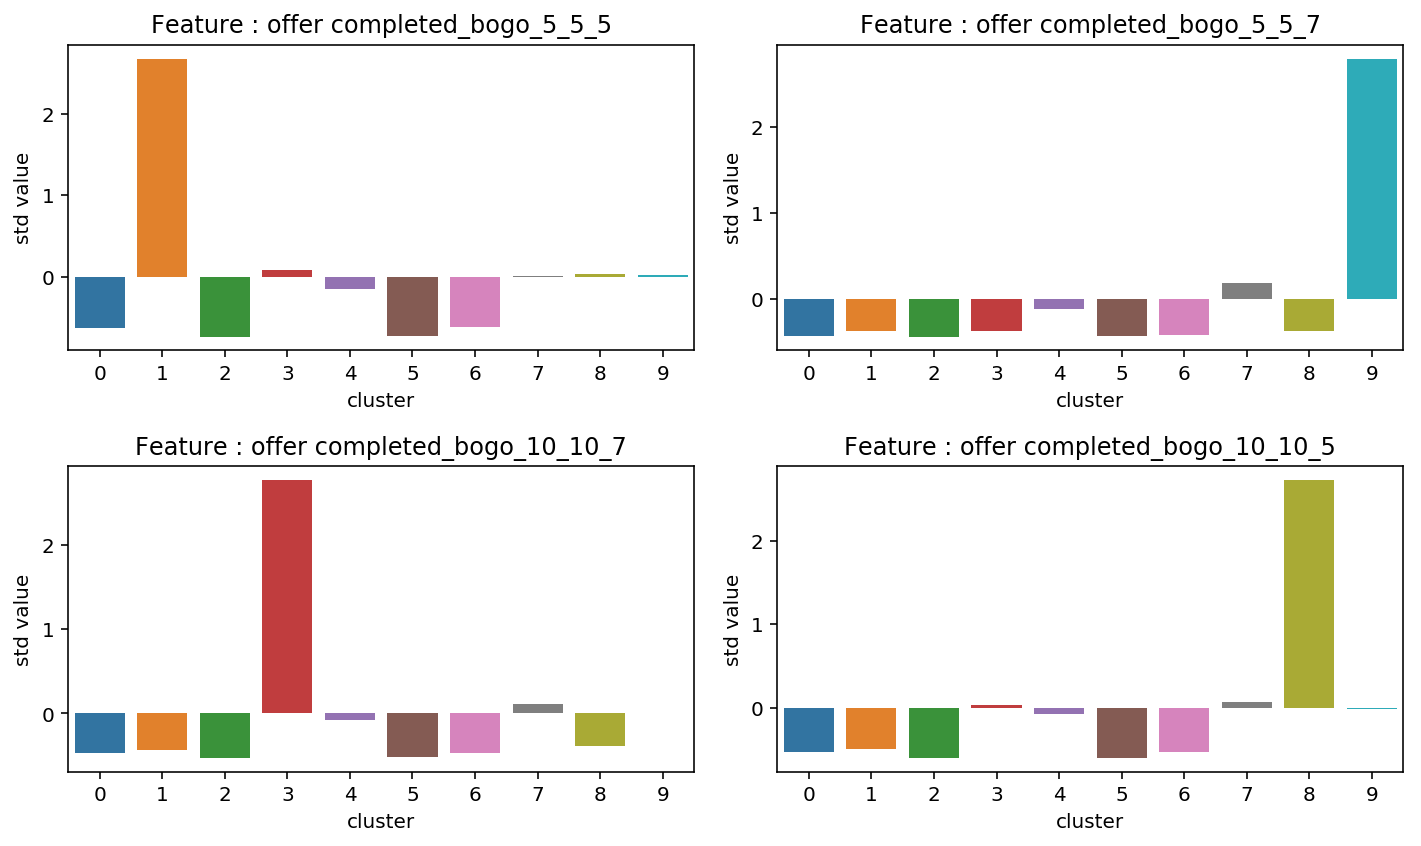

In [66]:
""" Visualize BOGO related cluster """
features= [
    'offer completed_bogo_5_5_5',
    'offer completed_bogo_5_5_7',
    'offer completed_bogo_10_10_7',
    'offer completed_bogo_10_10_5']

compare_features(profile_main_centroid_std, features, figsize=(10,6))

### BOGO CLUSTERS
* **cluster 1 and 9** - very responsive to difficulty 5
* **cluster 3 and 8** - very responsive to diffuculty 10

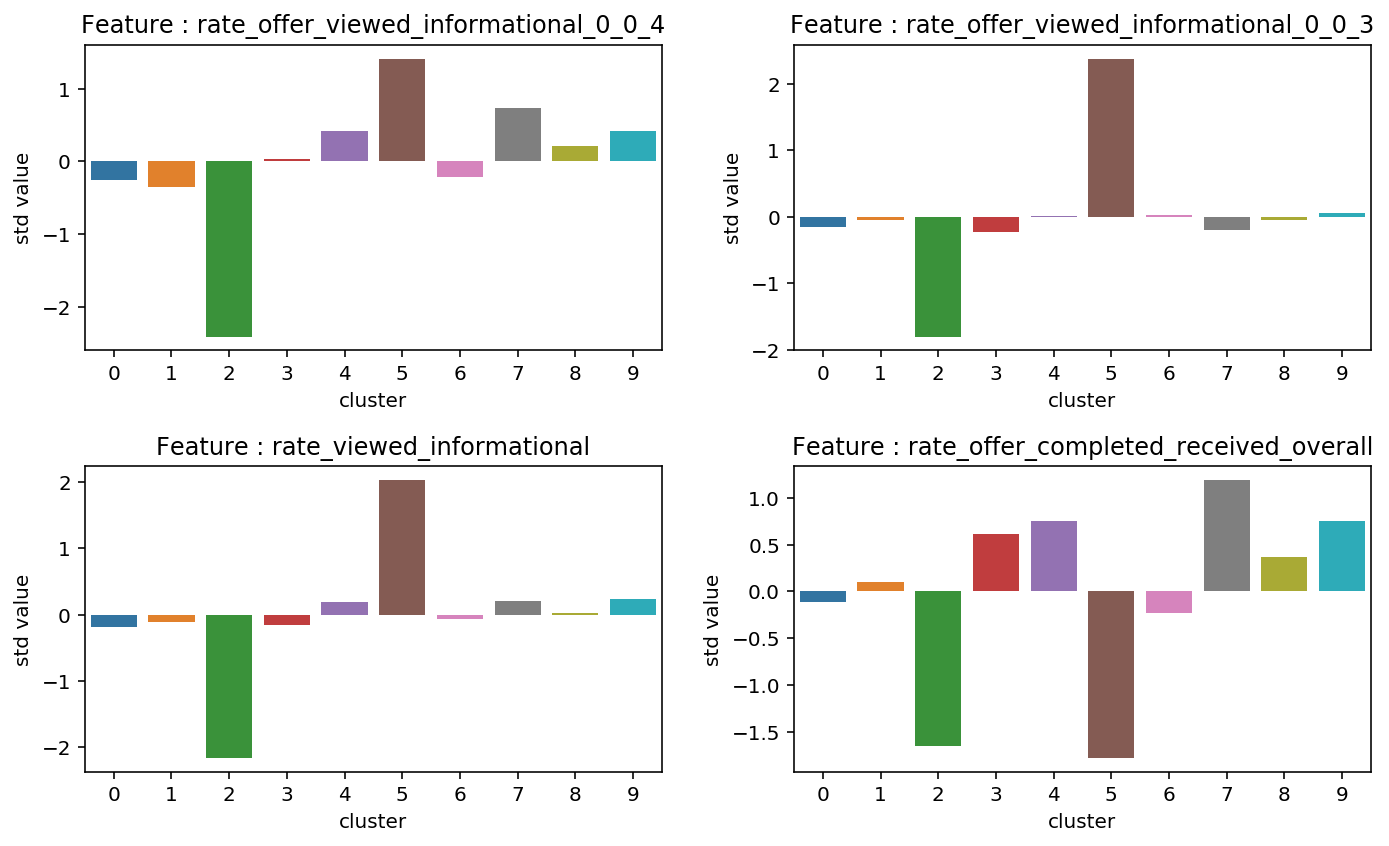

In [67]:
""" Visualize INFORMATIONAL related cluster """

features= ['rate_offer_viewed_informational_0_0_4',
     'rate_offer_viewed_informational_0_0_3',  'rate_viewed_informational','rate_offer_completed_received_overall']

compare_features(profile_main_centroid_std, features, figsize=(10,6))

### INFORMATION CLUSTERS
* **cluster 5** - very responsive to informational duration of 3 days
* **cluster 5,7,9** - very responsive to informational duration of 3 days
* **clusters 3,4,7,8,9** - high rates of offer completed

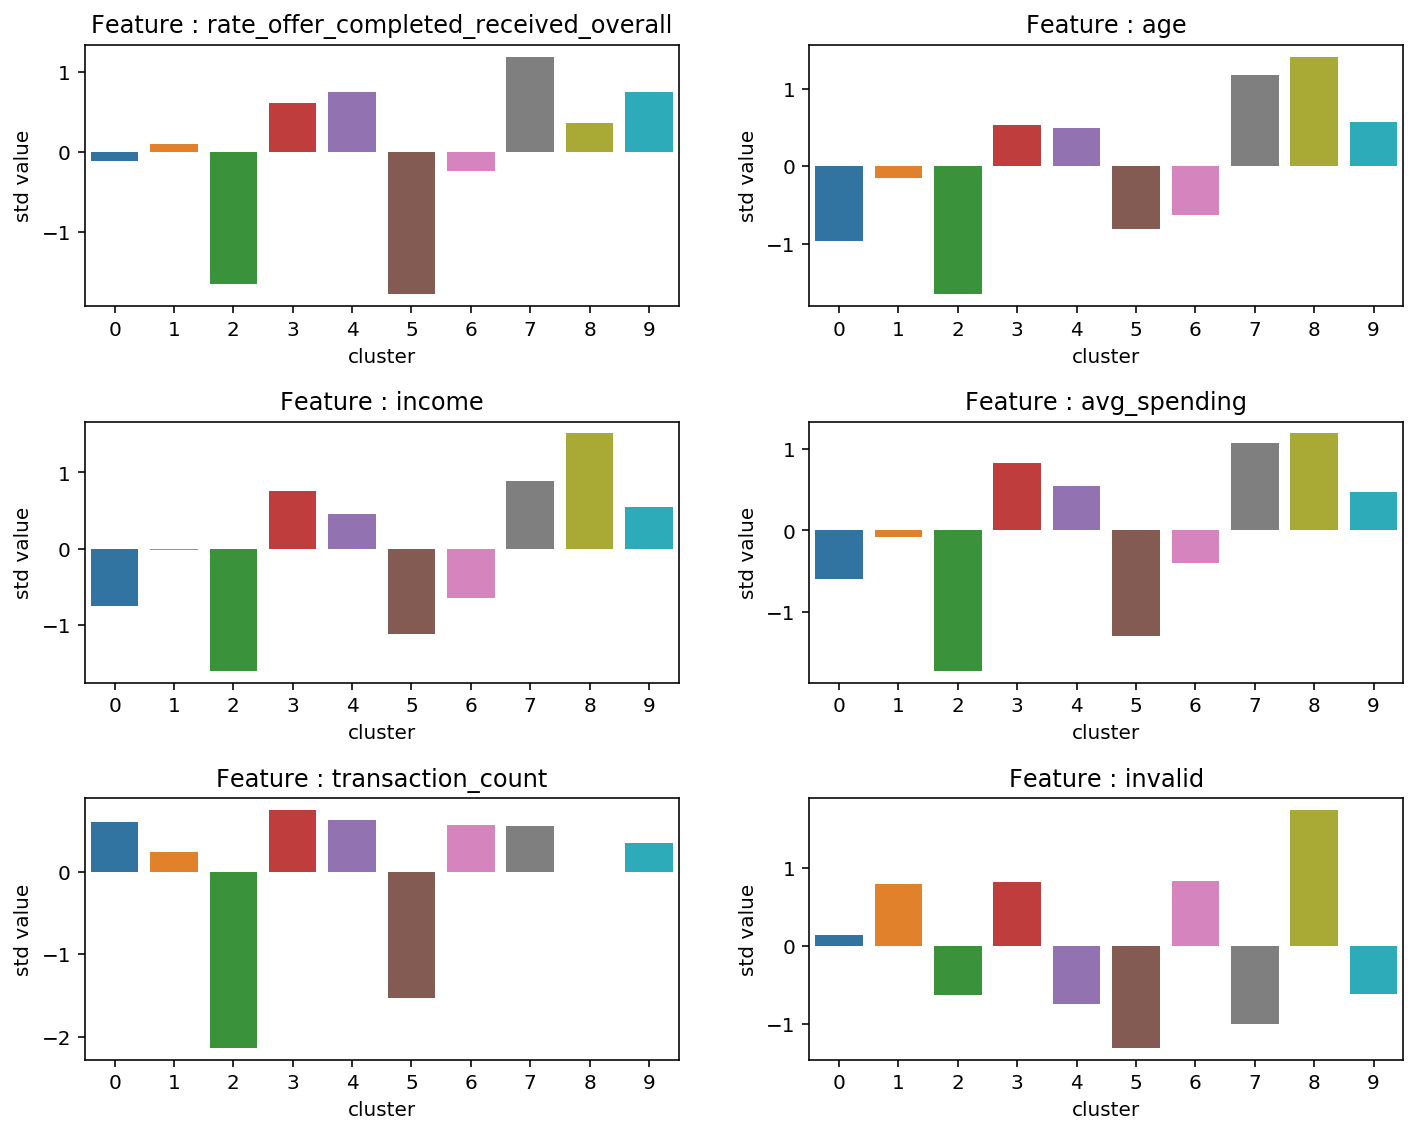

In [78]:
""" Visualize other features """

features= ['rate_offer_completed_received_overall', 'age', 'income', 'avg_spending',
           'transaction_count','invalid']

compare_features(profile_main_centroid_std, features, figsize=(10,8))

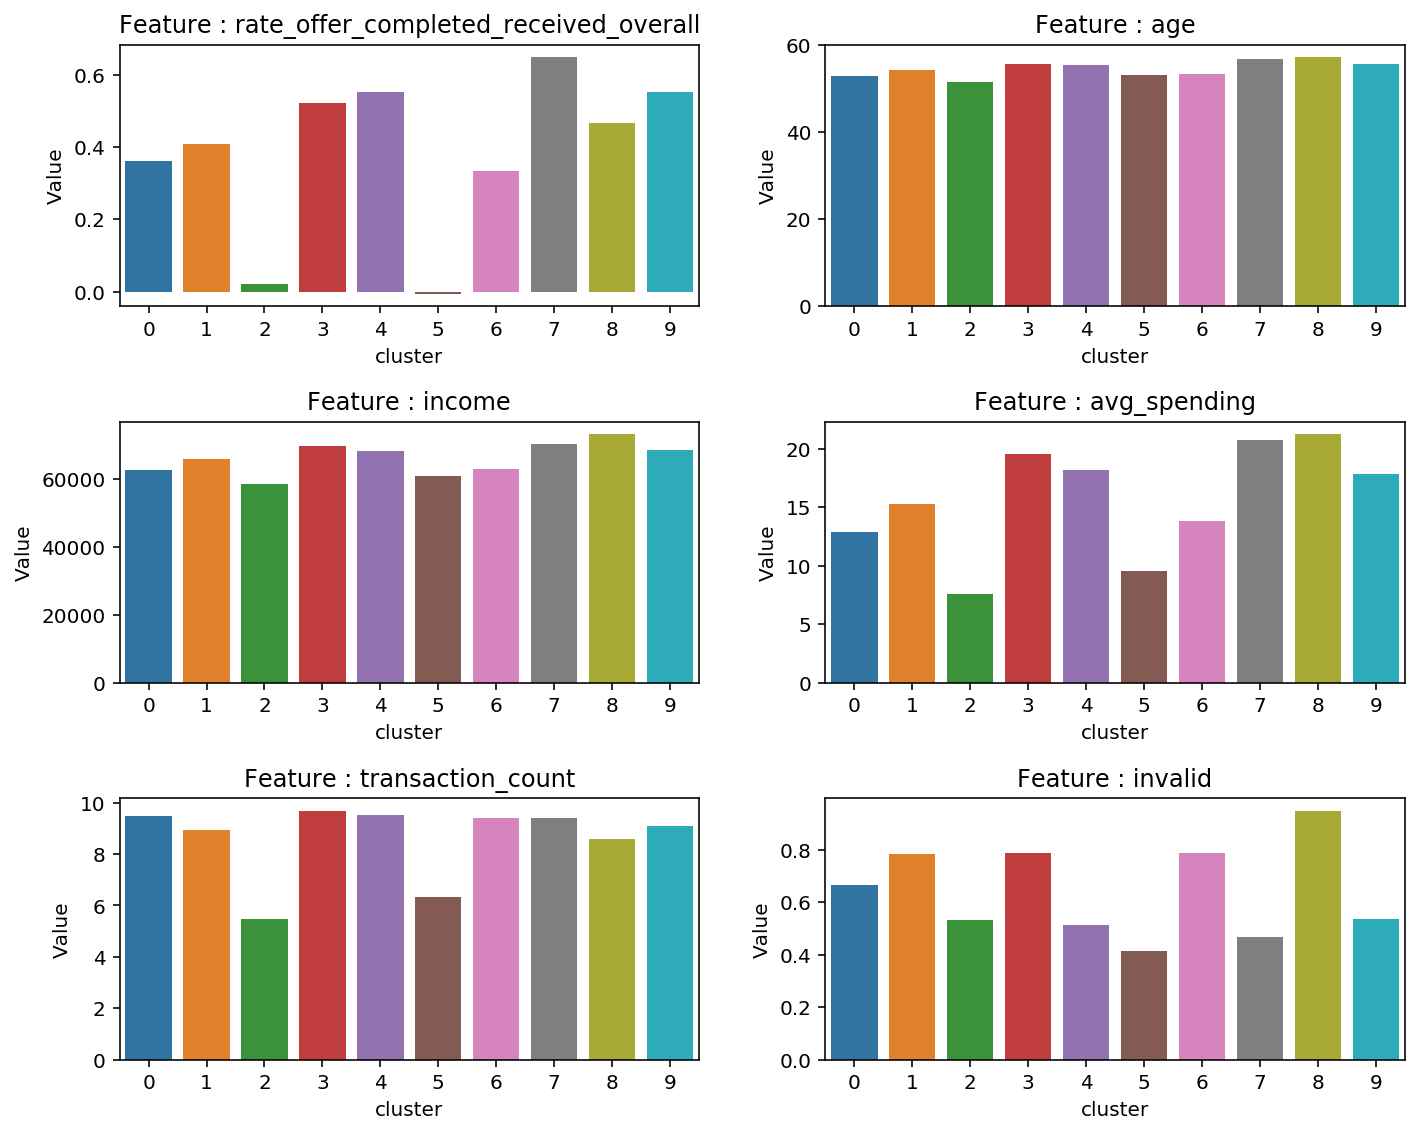

In [86]:
""" Visualize other features """

features= ['rate_offer_completed_received_overall', 'age', 'income', 'avg_spending',
           'transaction_count','invalid']

compare_features_(profile_main_centroid, features, figsize=(10,8))

In [108]:
profile_cluster_main.groupby('cluster')[features].mean()

,rate_offer_completed_received_overall,age,income,avg_spending,transaction_count,invalid
cluster,,,,,,
0,0.370421,52.930647,63325.627477,12.645337,10.029062,0.661823
1,0.410250,54.309347,66261.869436,15.419880,9.223294,0.758902
2,0.000000,51.532901,58133.100698,7.163084,4.973081,0.508475
3,0.523273,55.607093,69760.083449,19.577705,9.801113,0.784423
4,0.549670,55.542373,68041.666667,18.355451,9.540254,0.516243
5,0.001646,52.973464,59957.248157,9.547389,5.661916,0.480590
6,0.344022,53.567445,63800.301432,13.842462,9.913338,0.768651
7,0.645244,56.739092,70043.630017,20.756231,9.371728,0.467714
8,0.467851,57.228758,73492.647059,21.347108,8.803922,0.920752


In [107]:
dff.to_clipboard()

In [70]:
""" create gender df """
genders = ['gender_F','gender_M', 'gender_O']
gender_df = profile_cluster_main[['gender_F','gender_M', 'gender_O', 'cluster']]#.idxmax(axis=1)#.shape
gender_df['gender'] = gender_df[genders].idxmax(axis=1)
gender_df = gender_df.drop(genders, axis=1)

""" create member_year df """
members = profile_cluster_main.columns[profile_cluster_main.columns.str.contains('member_year')].tolist()
member_df = profile_cluster_main[members + ['cluster']]#.idxmax(axis=1)#.shape
member_df['member_year'] = member_df[members].idxmax(axis=1)
member_df = member_df.drop(members, axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Gender Distribution')

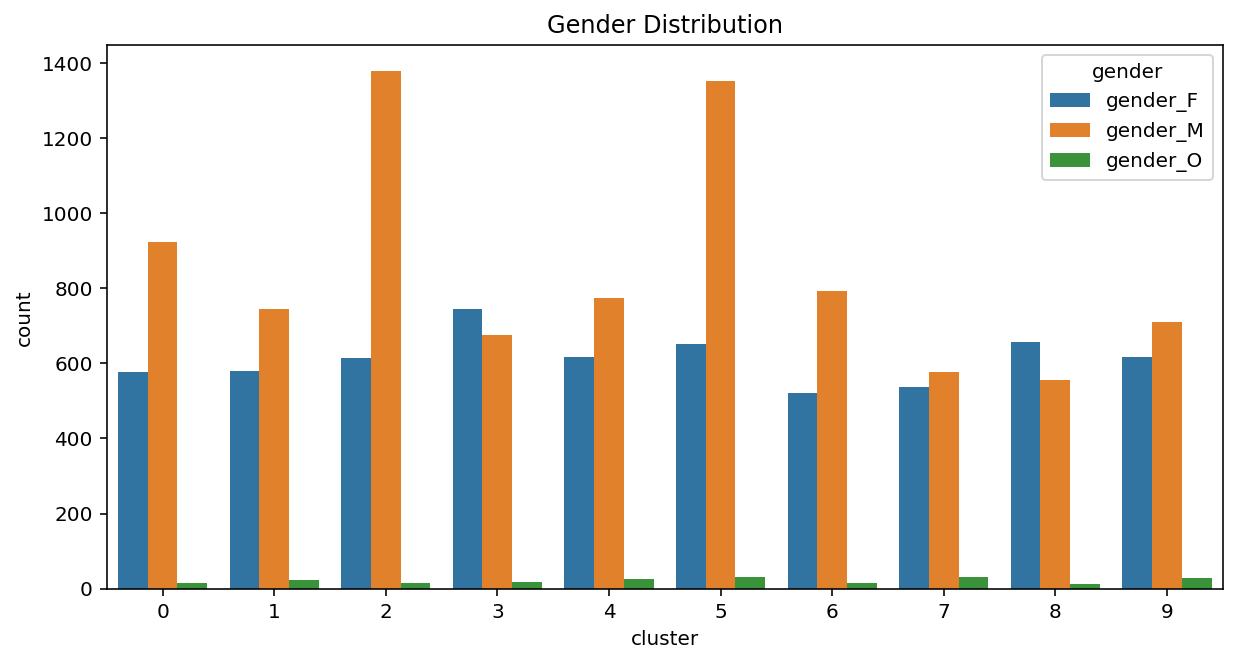

In [71]:
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('cluster', hue='gender', data= gender_df, ax=ax)
ax.set_title("Gender Distribution")

Text(0.5, 1.0, 'Member Year Distribution')

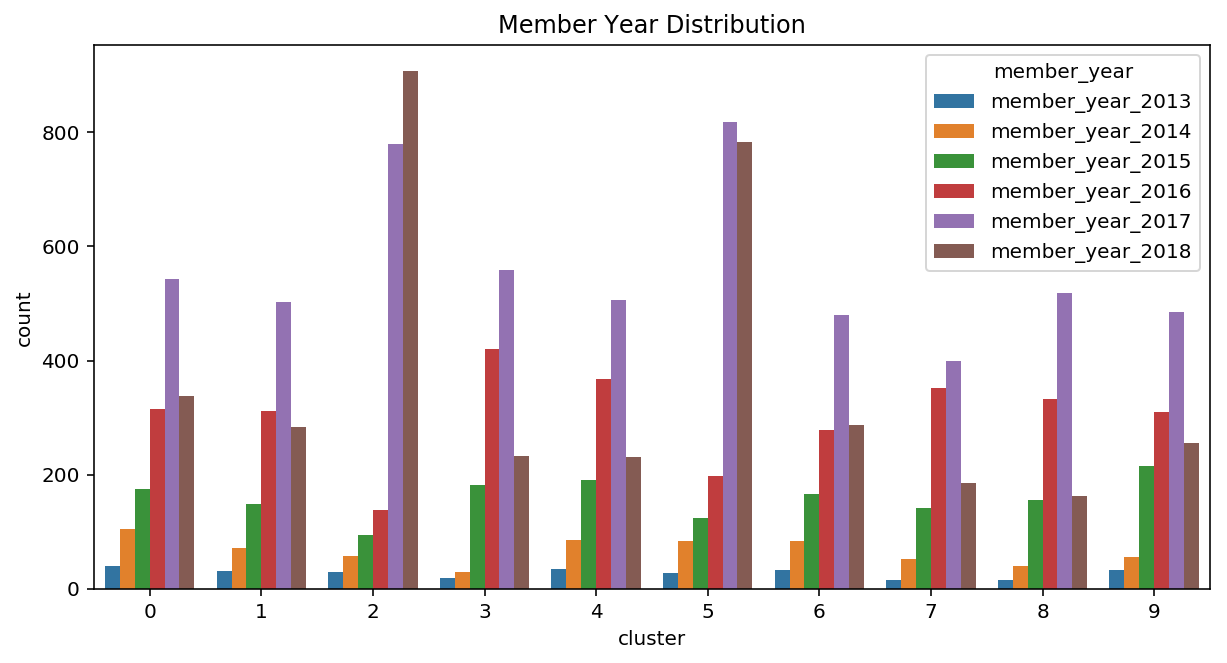

In [72]:
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('cluster', hue='member_year', data= member_df, ax=ax,
             hue_order = ['member_year_' + str(i) for i in range(2013,2019,1)])
ax.set_title("Member Year Distribution")